## Technical Analysis

In [34]:
#Installing the technical analysis library

#! pip install --upgrade ta

In [35]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import re
import warnings
import itertools
import collections
import ta


warnings.filterwarnings('ignore')

In [36]:
from matplotlib.colors import LinearSegmentedColormap
from functools import reduce
from math import ceil
from datetime import timedelta, datetime
from ta import add_all_ta_features
from ta.utils import dropna

In [37]:
COLORS = ['#2ec4b6', '#1e9fb4', '#0f7ab2', '#285892', '#49306b', '#7a3161', '#a13258', '#c63351', '#ea3449']

CAT_COLORS = ['#2EC4B6', '#0E79B2', '#49306B', '#9A325A', '#EA3449']
CONTRAST_COLORS = [COLORS[i] for i in range(len(COLORS)) if (i%2) == 0]

DIV_COLORS = ['#0e79b2', '#4b9ac3', '#84b8d4', '#bcd6e4', '#f4f4f4', '#c6c0d0', '#9b8eac', '#715e8b', '#49306b']

DIV_COL_HALF = ['#f4f4f4', '#bed3da', '#8ab2bf', '#5592a5', '#20718b']

UMP_COLORS = ['#22446D', '#FC9E4F', '#AB2346' ,'#6ABB5D']

DEFAULT_PALETTE = sns.color_palette(COLORS)
CONTRAST_PALETTE = sns.color_palette(CONTRAST_COLORS)
DIVERGENT_PALETTE = sns.color_palette(DIV_COLORS)
DIVHALF_PALETTE = sns.color_palette(DIV_COL_HALF)
CAT_PALETTE = sns.color_palette(CAT_COLORS)
UMP_PALETTE = sns.color_palette(UMP_COLORS)


DIV_CMAP = LinearSegmentedColormap.from_list("div_colors", DIV_COLORS)
DIV_H_CMAP = LinearSegmentedColormap.from_list("div_colors", DIV_COL_HALF)
CAT_CMAP = LinearSegmentedColormap.from_list("cat_colors", CAT_COLORS)
UMP_CMAP = LinearSegmentedColormap.from_list("ump_colors", UMP_COLORS)


SHOW_PLOTS = True
SAVE_PLOTS = True
RANDOM_STATE = 9

IMG_PATH = 'imgs/'
DATA_IN_PATH = '../../source/data/'
DATA_OUT_PATH = '../data_out/'

### Load data

In [38]:
df_adjclose = pd.read_csv(DATA_IN_PATH + "adj_close.csv")
df_adjclose.head(3)

Date  ADA-USD  ATOM-USD  AVAX-USD  AXS-USD      BTC-USD  ETH-USD  \
0  2017-04-26      NaN       NaN       NaN      NaN  1281.079956      NaN   
1  2017-04-27      NaN       NaN       NaN      NaN  1317.729980      NaN   
2  2017-04-28      NaN       NaN       NaN      NaN  1316.479980      NaN   

   LINK-USD  LUNA1-USD  MATIC-USD  SOL-USD  
0       NaN        NaN        NaN      NaN  
1       NaN        NaN        NaN      NaN  
2       NaN        NaN        NaN      NaN

In [39]:
df_close = pd.read_csv(DATA_IN_PATH + "close.csv")
df_close.head(3)

Date  ADA-USD  ATOM-USD  AVAX-USD  AXS-USD      BTC-USD  ETH-USD  \
0  2017-04-26      NaN       NaN       NaN      NaN  1281.079956      NaN   
1  2017-04-27      NaN       NaN       NaN      NaN  1317.729980      NaN   
2  2017-04-28      NaN       NaN       NaN      NaN  1316.479980      NaN   

   LINK-USD  LUNA1-USD  MATIC-USD  SOL-USD  
0       NaN        NaN        NaN      NaN  
1       NaN        NaN        NaN      NaN  
2       NaN        NaN        NaN      NaN

In [40]:
df_high = pd.read_csv(DATA_IN_PATH + "high.csv")
df_high.head(3)

Date  ADA-USD  ATOM-USD  AVAX-USD  AXS-USD      BTC-USD  ETH-USD  \
0  2017-04-26      NaN       NaN       NaN      NaN  1294.829956      NaN   
1  2017-04-27      NaN       NaN       NaN      NaN  1319.699951      NaN   
2  2017-04-28      NaN       NaN       NaN      NaN  1331.280029      NaN   

   LINK-USD  LUNA1-USD  MATIC-USD  SOL-USD  
0       NaN        NaN        NaN      NaN  
1       NaN        NaN        NaN      NaN  
2       NaN        NaN        NaN      NaN

In [41]:
df_low = pd.read_csv(DATA_IN_PATH + "low.csv")
df_low.head(3)

Date  ADA-USD  ATOM-USD  AVAX-USD  AXS-USD      BTC-USD  ETH-USD  \
0  2017-04-26      NaN       NaN       NaN      NaN  1265.930054      NaN   
1  2017-04-27      NaN       NaN       NaN      NaN  1281.300049      NaN   
2  2017-04-28      NaN       NaN       NaN      NaN  1292.369995      NaN   

   LINK-USD  LUNA1-USD  MATIC-USD  SOL-USD  
0       NaN        NaN        NaN      NaN  
1       NaN        NaN        NaN      NaN  
2       NaN        NaN        NaN      NaN

In [42]:
df_open = pd.read_csv(DATA_IN_PATH + "open.csv")
df_open.head(3)

Date  ADA-USD  ATOM-USD  AVAX-USD  AXS-USD      BTC-USD  ETH-USD  \
0  2017-04-26      NaN       NaN       NaN      NaN  1265.989990      NaN   
1  2017-04-27      NaN       NaN       NaN      NaN  1281.880005      NaN   
2  2017-04-28      NaN       NaN       NaN      NaN  1317.739990      NaN   

   LINK-USD  LUNA1-USD  MATIC-USD  SOL-USD  
0       NaN        NaN        NaN      NaN  
1       NaN        NaN        NaN      NaN  
2       NaN        NaN        NaN      NaN

In [43]:
df_vol = pd.read_csv(DATA_IN_PATH + "volume.csv")
df_vol.head(3)

Date  ADA-USD  ATOM-USD  AVAX-USD  AXS-USD    BTC-USD  ETH-USD  \
0  2017-04-26      NaN       NaN       NaN      NaN  329631008      NaN   
1  2017-04-27      NaN       NaN       NaN      NaN  449196992      NaN   
2  2017-04-28      NaN       NaN       NaN      NaN  527488992      NaN   

   LINK-USD  LUNA1-USD  MATIC-USD  SOL-USD  
0       NaN        NaN        NaN      NaN  
1       NaN        NaN        NaN      NaN  
2       NaN        NaN        NaN      NaN

In [44]:
df_list = [df_adjclose,df_close,df_high,df_low]

In [45]:
df_ada = df_adjclose[['Date','ADA-USD']].rename(columns={'ADA-USD':'adj_close'})\
        .merge(df_close[['Date','ADA-USD']].rename(columns={'ADA-USD':'close'}), left_on='Date', right_on='Date')\
        .merge(df_high[['Date','ADA-USD']].rename(columns={'ADA-USD':'high'}), left_on='Date', right_on='Date')\
        .merge(df_low[['Date','ADA-USD']].rename(columns={'ADA-USD':'low'}), left_on='Date', right_on='Date')\
        .merge(df_open[['Date','ADA-USD']].rename(columns={'ADA-USD':'open'}), left_on='Date', right_on='Date')\
        .merge(df_vol[['Date','ADA-USD']].rename(columns={'ADA-USD':'volume'}), left_on='Date', right_on='Date')

#df_ada = pd.DataFrame(columns=df_cols)
df_ada

Date  adj_close     close      high       low      open  \
0     2017-04-26        NaN       NaN       NaN       NaN       NaN   
1     2017-04-27        NaN       NaN       NaN       NaN       NaN   
2     2017-04-28        NaN       NaN       NaN       NaN       NaN   
3     2017-04-29        NaN       NaN       NaN       NaN       NaN   
4     2017-04-30        NaN       NaN       NaN       NaN       NaN   
...          ...        ...       ...       ...       ...       ...   
1821  2022-04-21   0.910474  0.910474  0.969453  0.896912  0.937272   
1822  2022-04-22   0.907154  0.907154  0.923741  0.893973  0.910335   
1823  2022-04-23   0.888503  0.888503  0.910614  0.884660  0.907185   
1824  2022-04-24   0.886350  0.886350  0.897855  0.881857  0.888279   
1825  2022-04-25   0.898695  0.898695  0.901707  0.830232  0.886378   

            volume  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
1821  8.711113e+08  
1822  7.257889e+08  
1823  4.479977e+08  
1824  4.876295e+08  
1825  1.139869e+09  

[1826 rows x 7 columns]

### For ADA

In [46]:
# Load data
df = df_ada[~(df_ada['Date'] > '2020-12-31')]

# Clean nan values
df = ta.utils.dropna(df)

print(df.columns)

# Add all ta features filling nans values
df = ta.add_all_ta_features(
    df, "open", "high", "low", "close", "volume", fillna=True
)

print(df.columns)
print(len(df.columns))

Index(['Date', 'adj_close', 'close', 'high', 'low', 'open', 'volume'], dtype='object')
Index(['Date', 'adj_close', 'close', 'high', 'low', 'open', 'volume',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'tr

In [47]:
# Creating visualizations
mpl.style.use('seaborn')

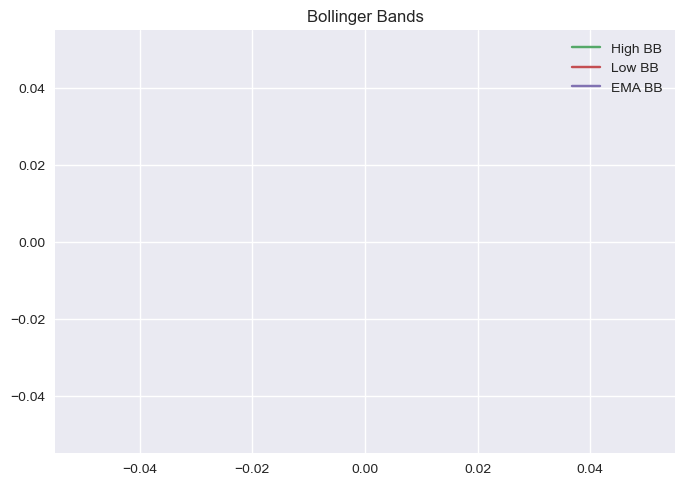

In [48]:
#Bollinger Bands

plt.plot(df[40500:41000].close)
plt.plot(df[40700:41000].volatility_bbh, label='High BB')
plt.plot(df[40700:41000].volatility_bbl, label='Low BB')
plt.plot(df[40700:41000].volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

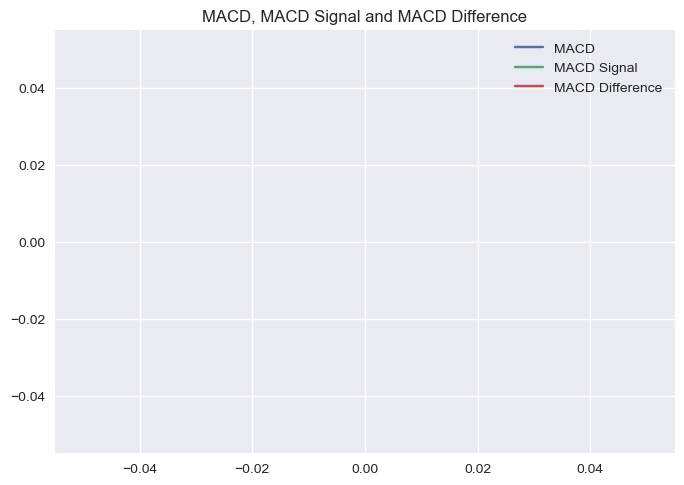

In [49]:
# MACD

plt.plot(df[40500:41000].trend_macd, label='MACD')
plt.plot(df[40500:41000].trend_macd_signal, label='MACD Signal')
plt.plot(df[40500:41000].trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

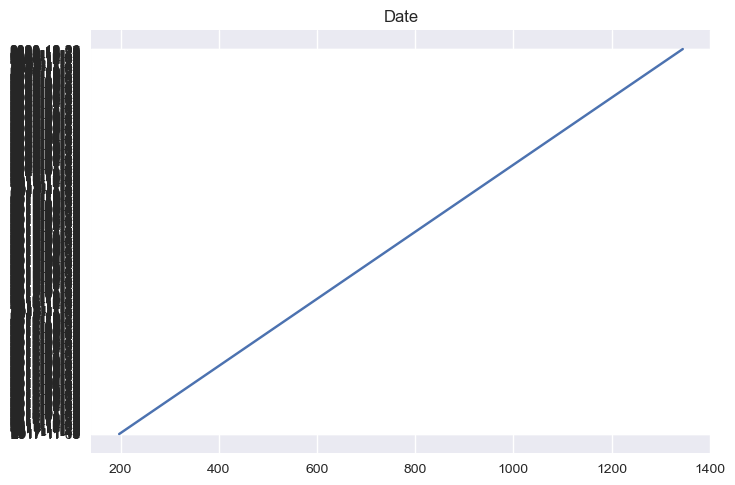

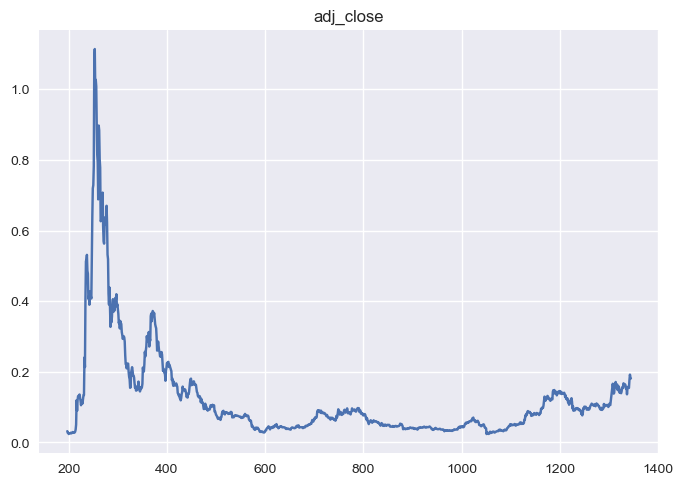

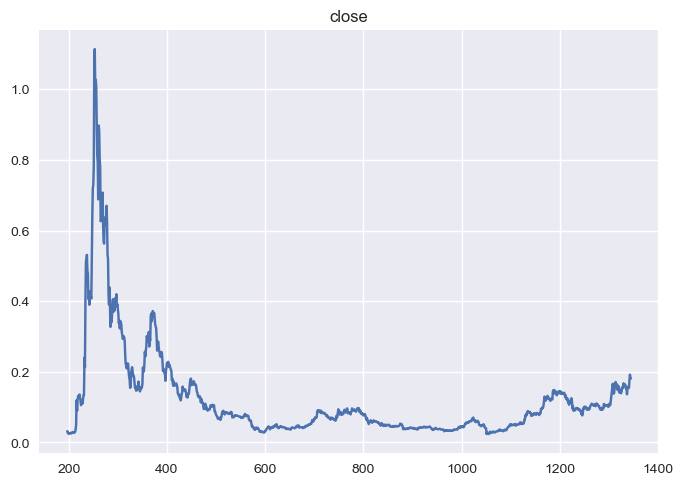

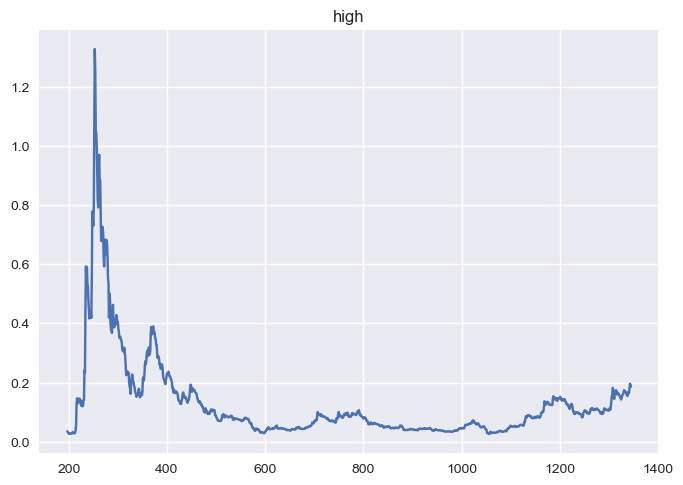

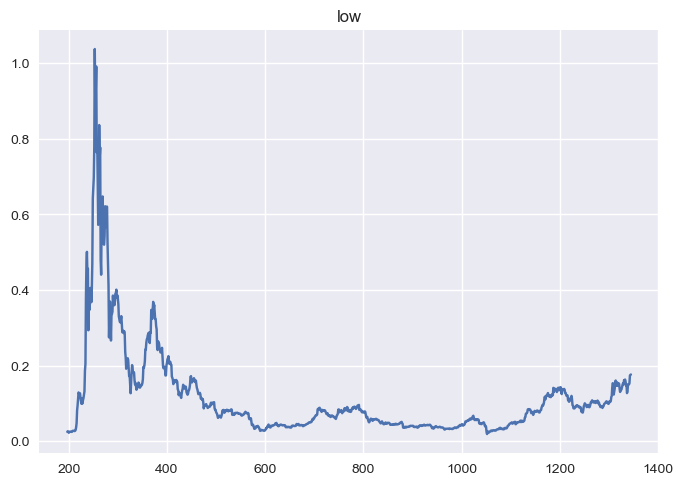

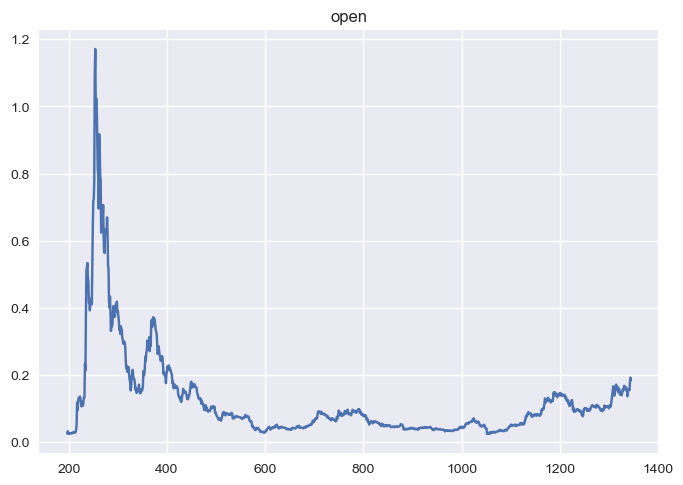

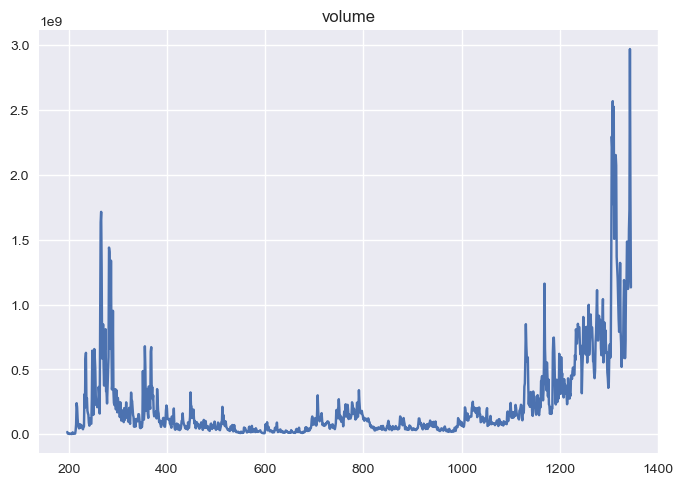

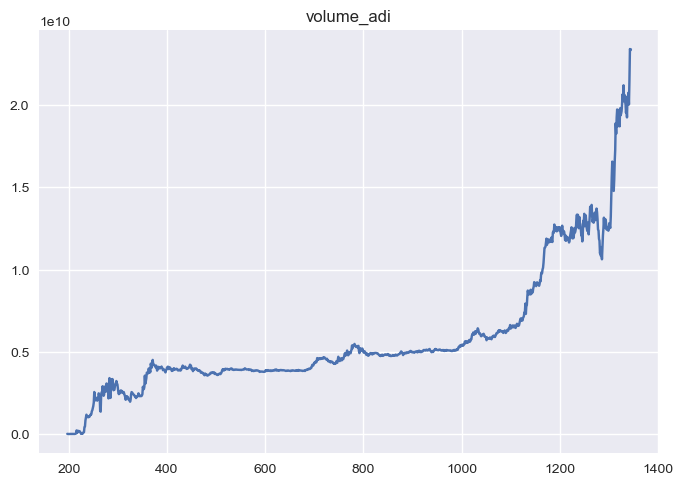

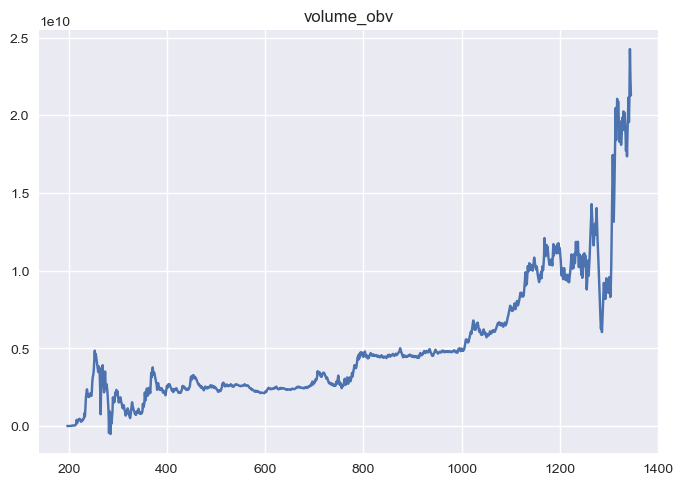

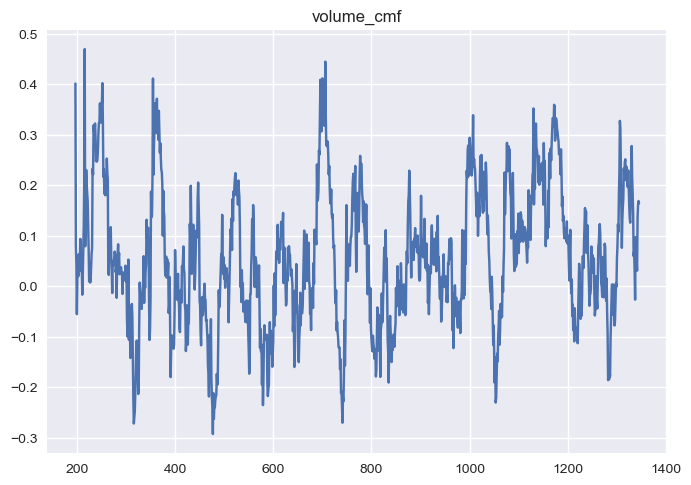

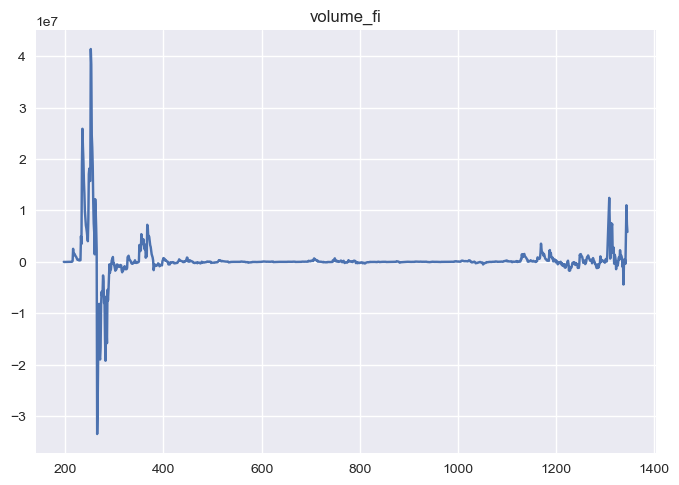

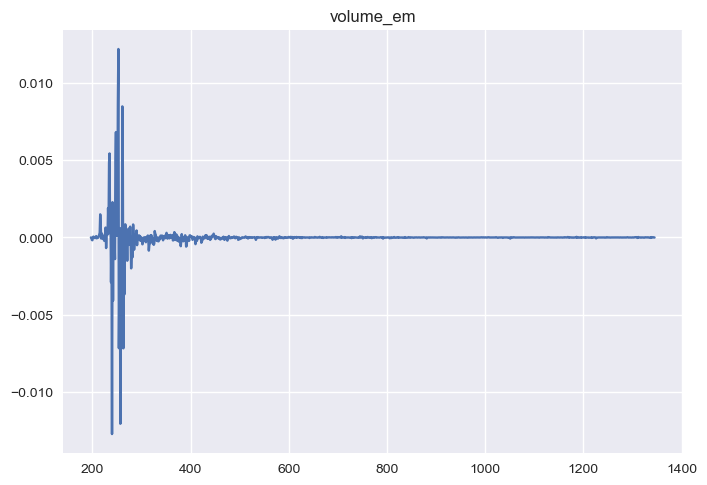

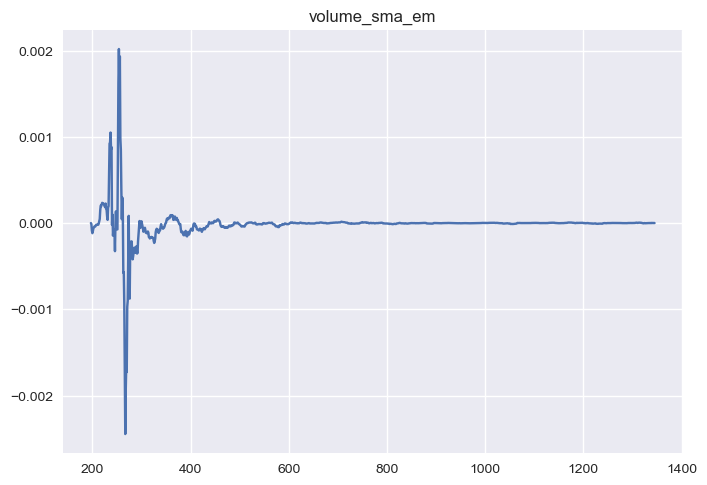

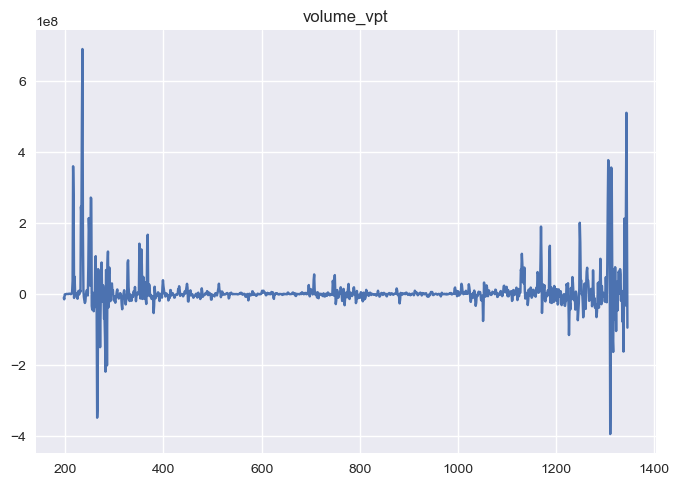

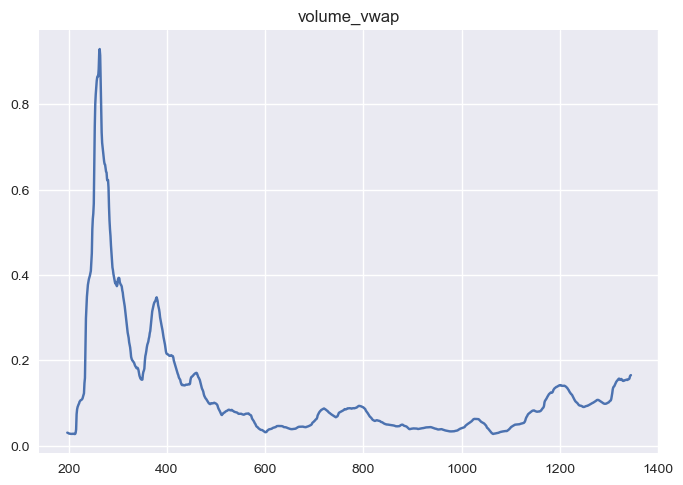

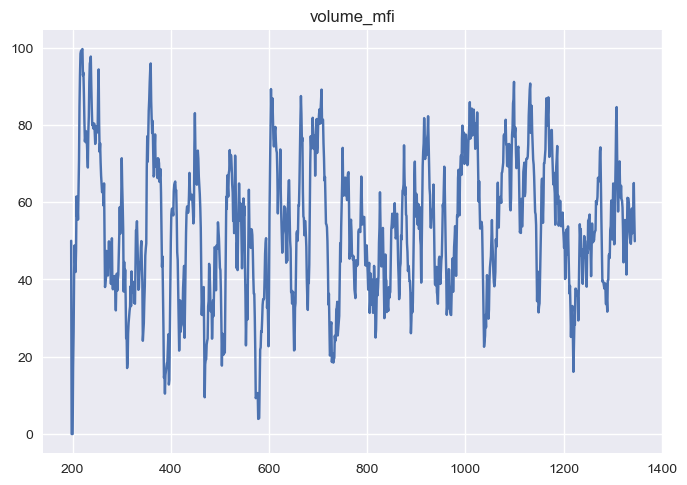

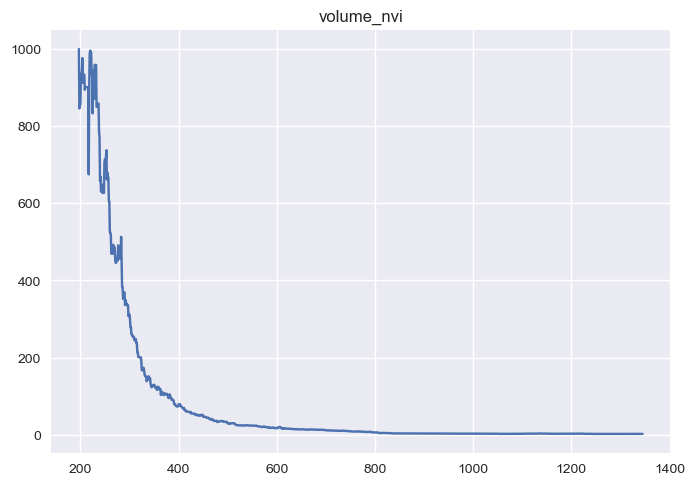

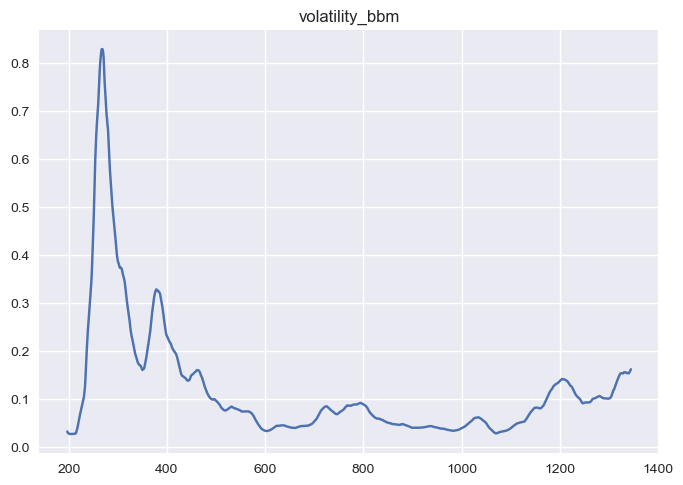

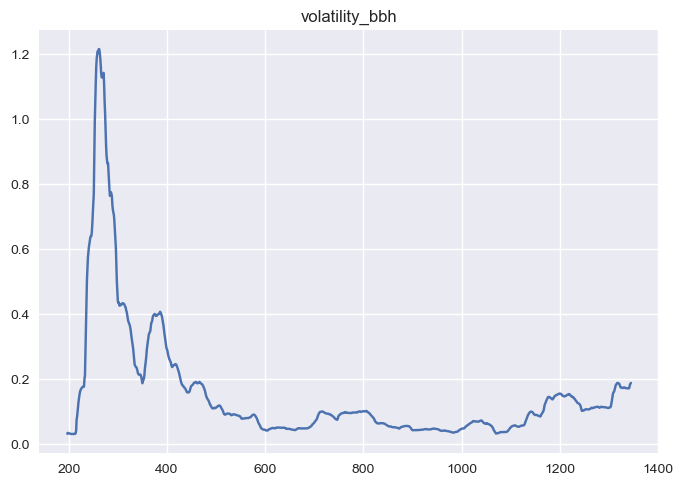

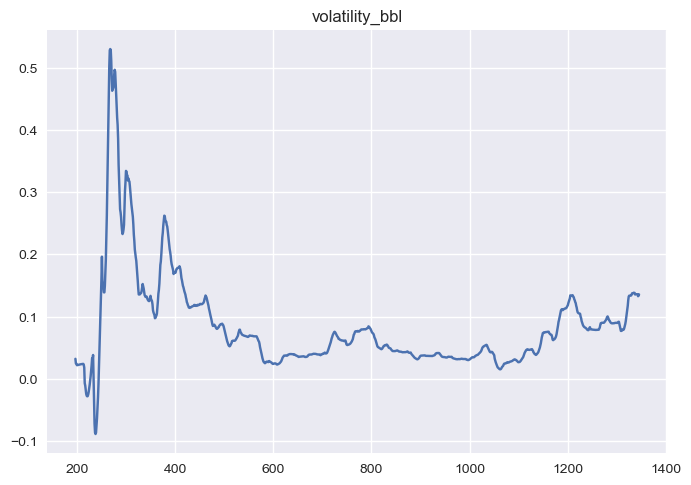

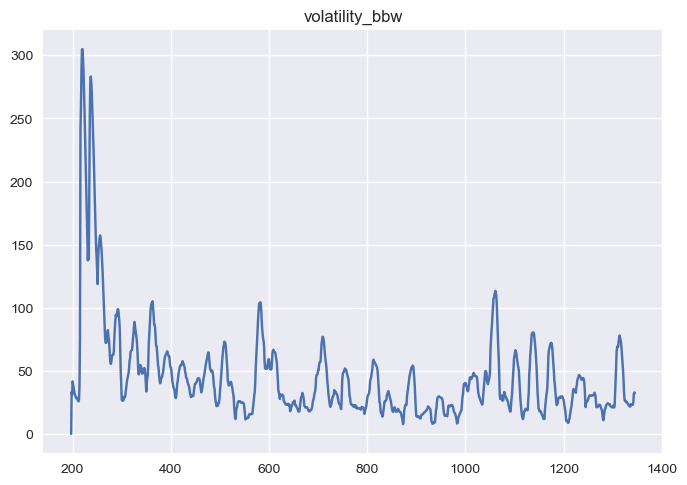

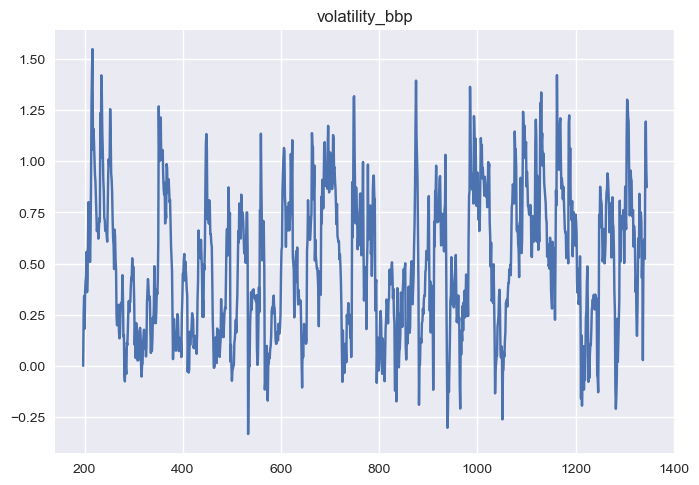

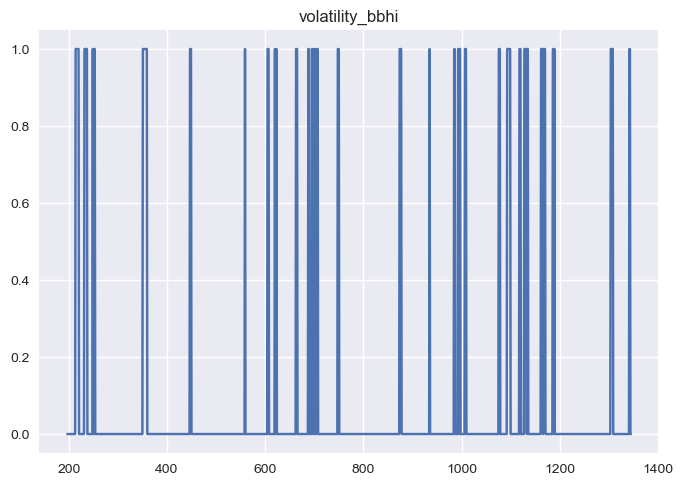

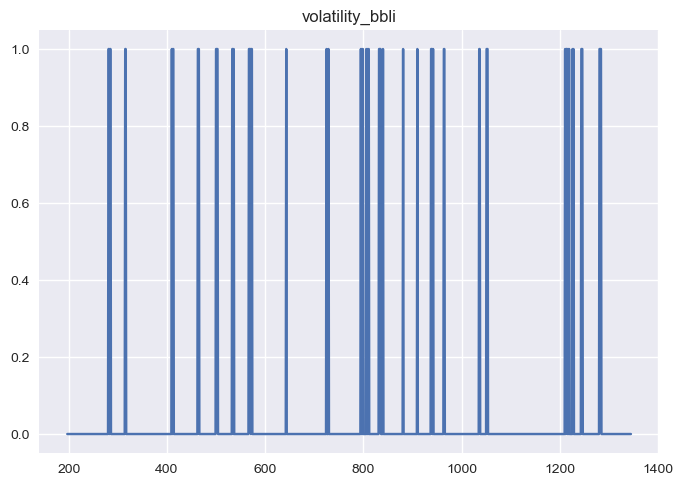

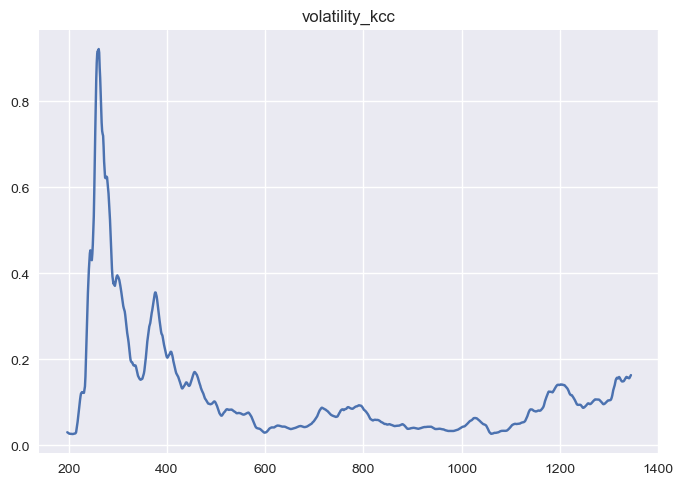

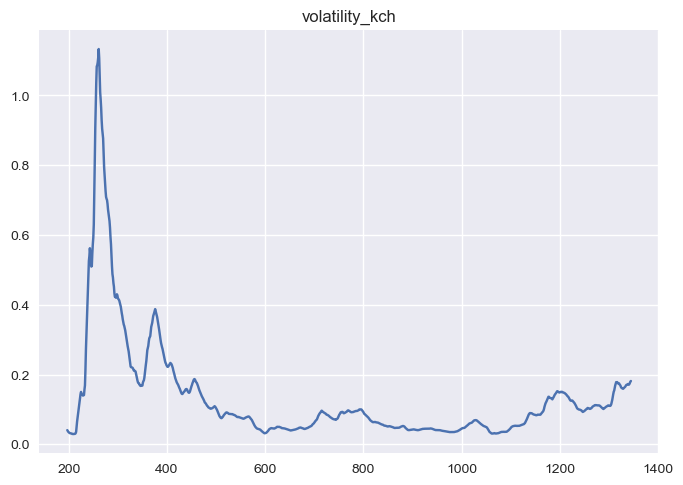

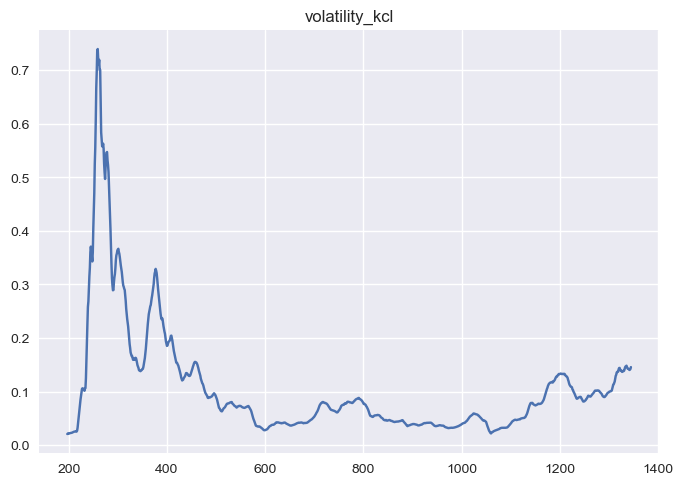

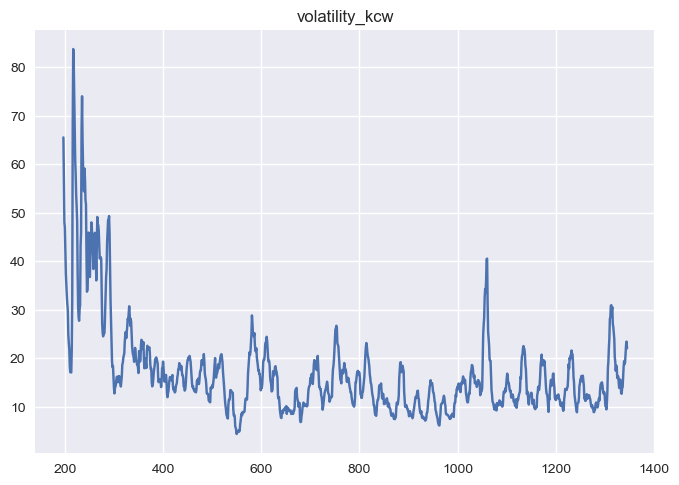

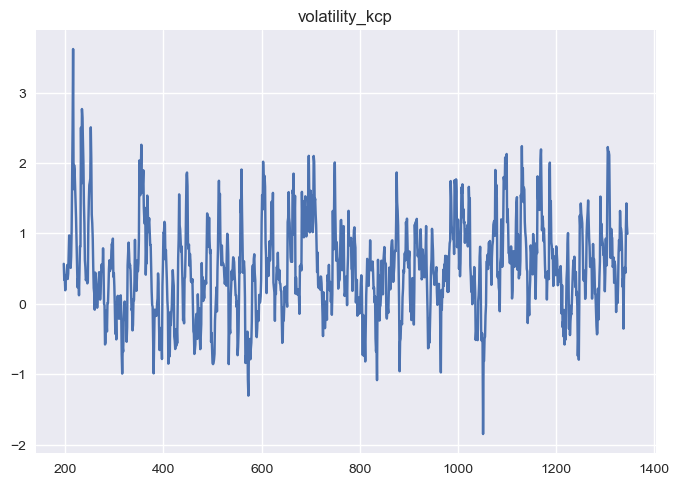

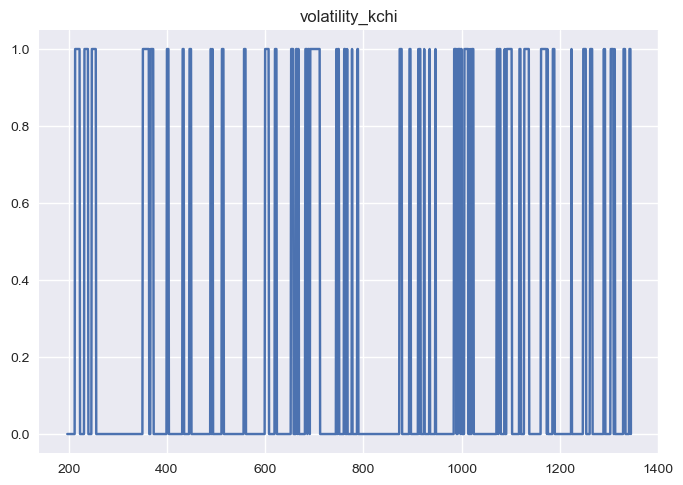

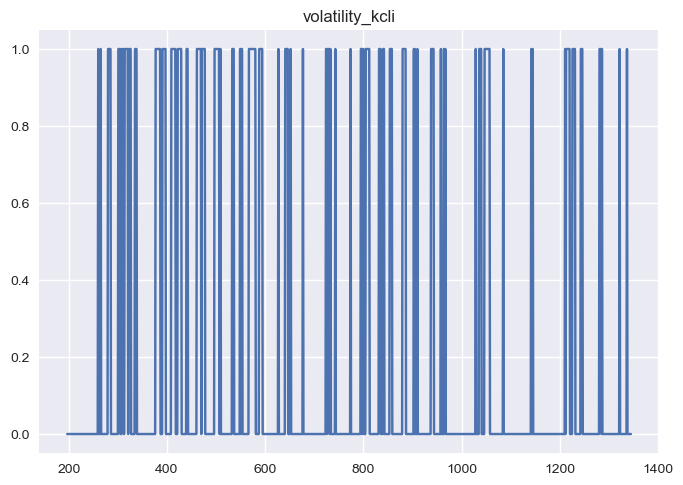

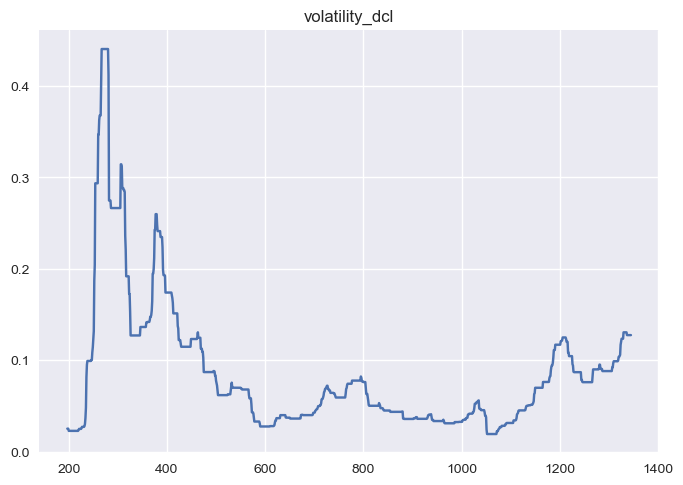

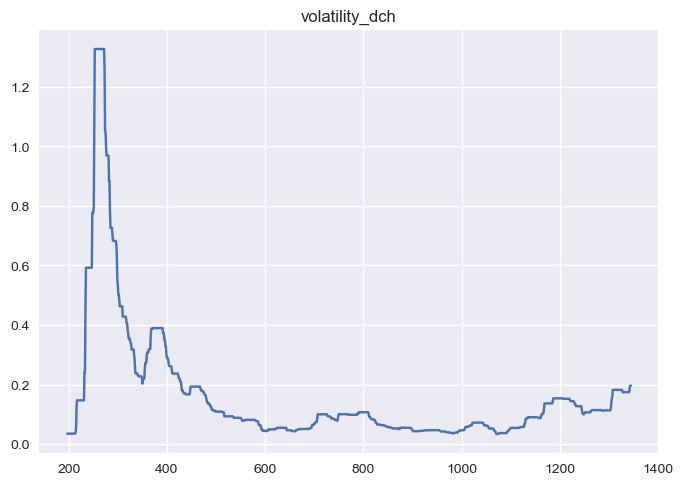

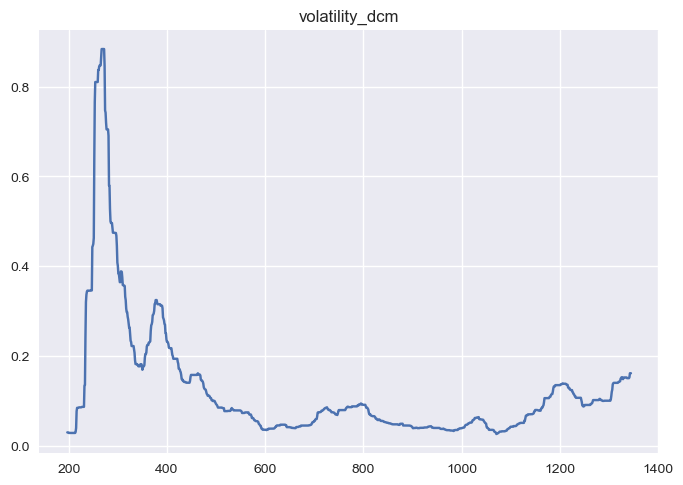

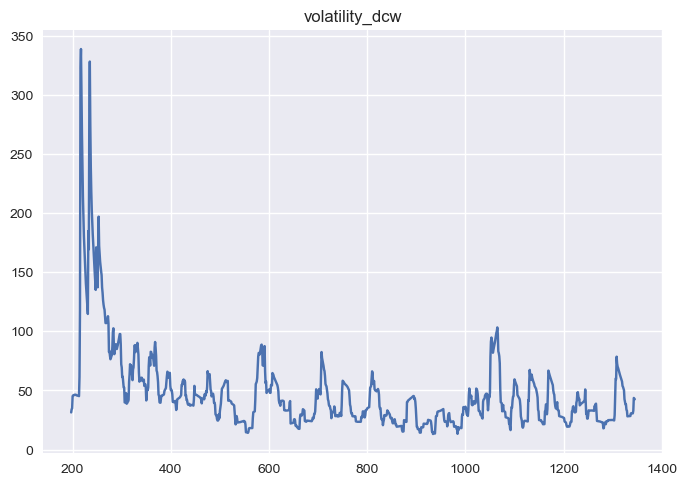

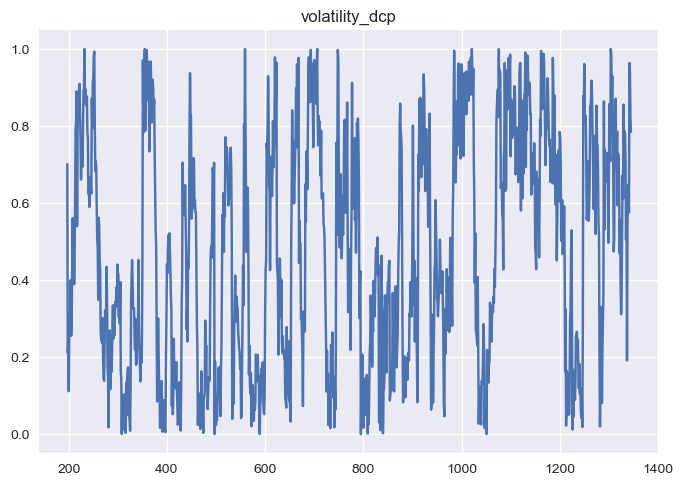

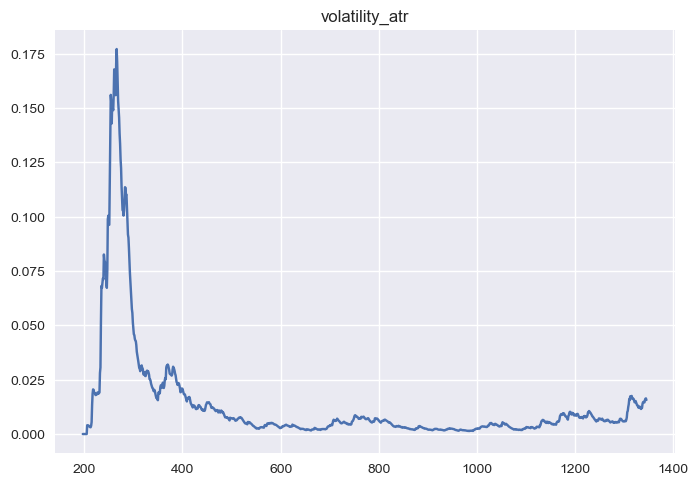

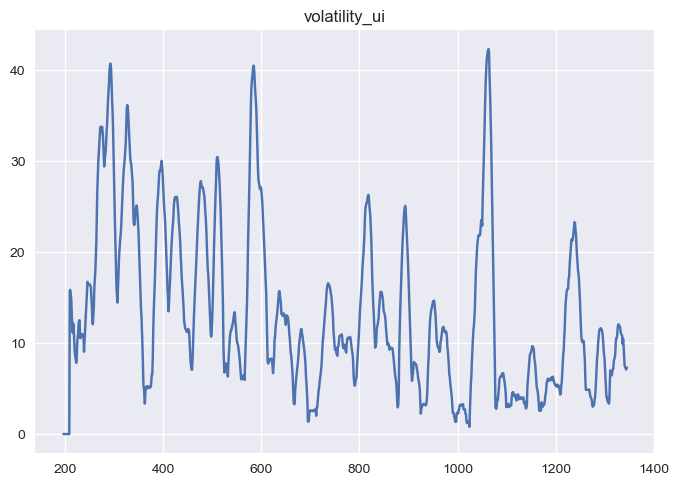

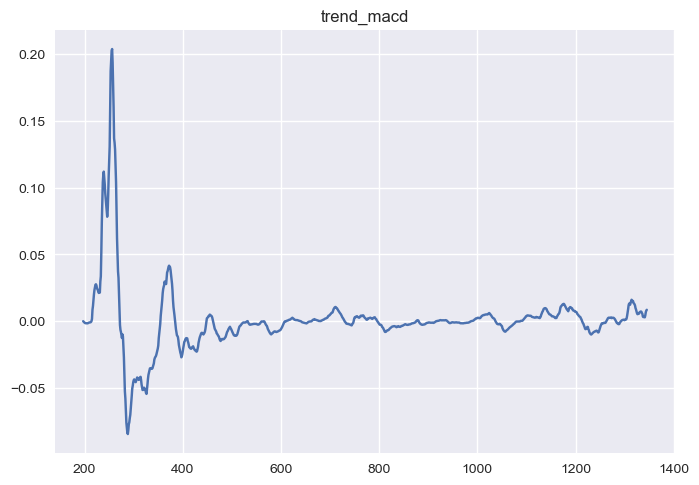

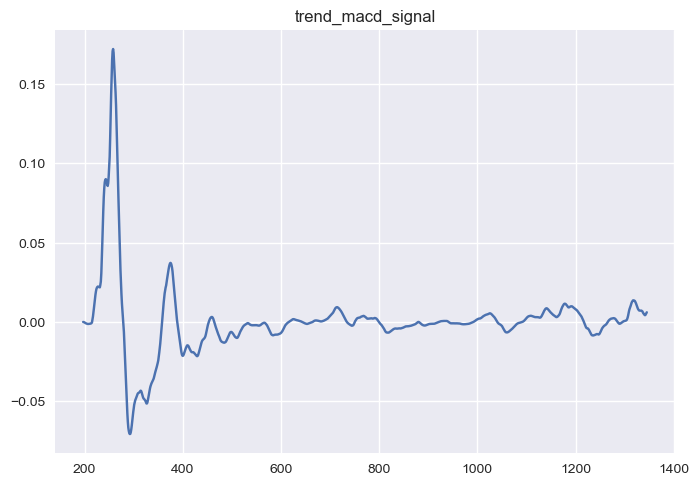

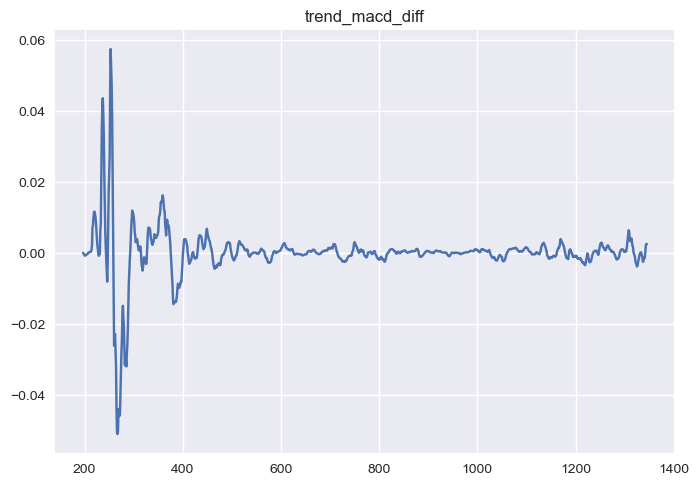

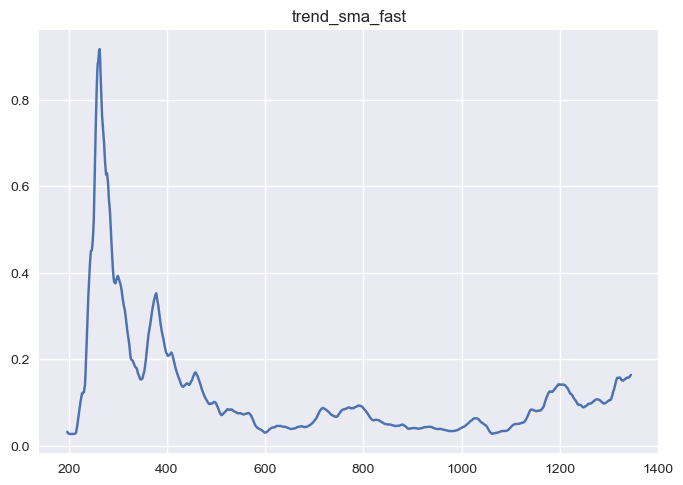

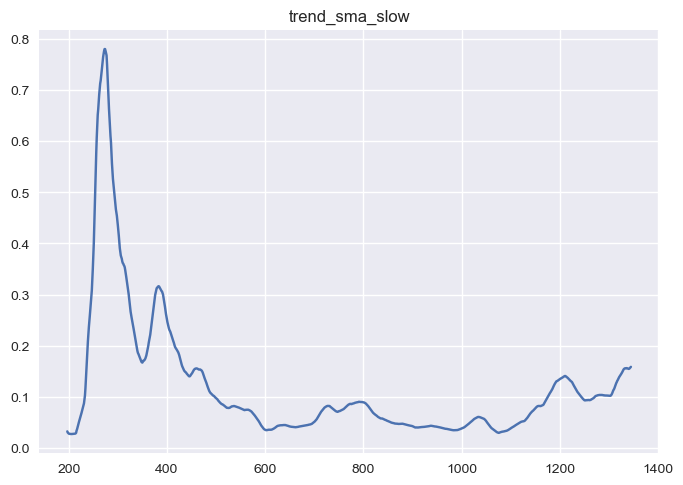

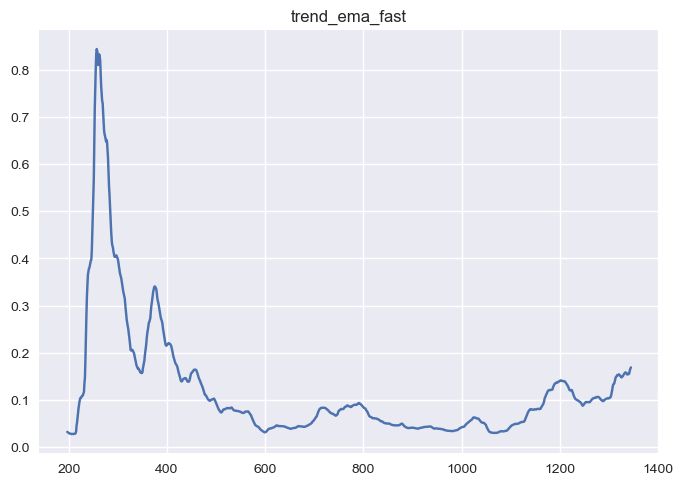

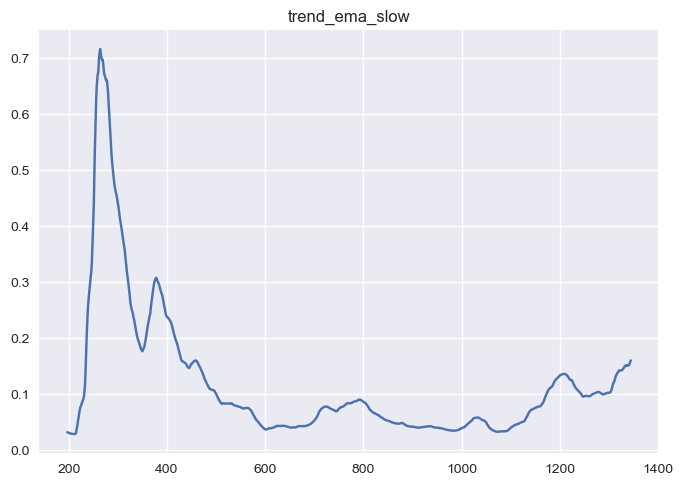

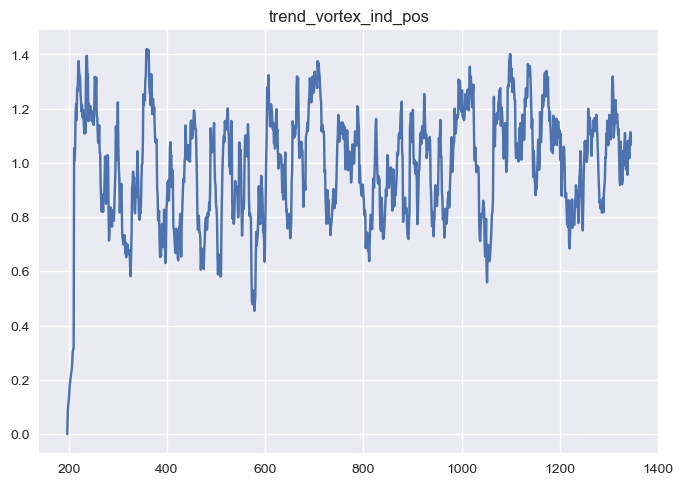

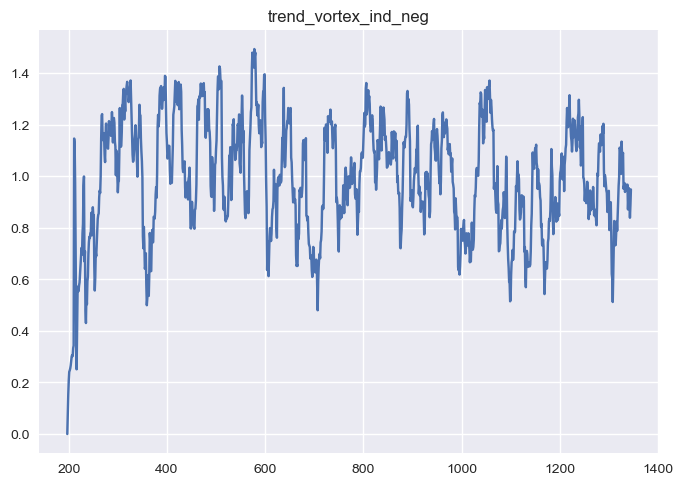

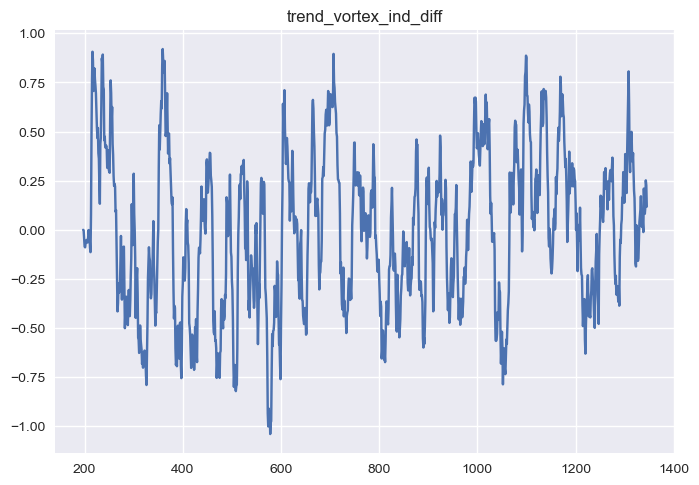

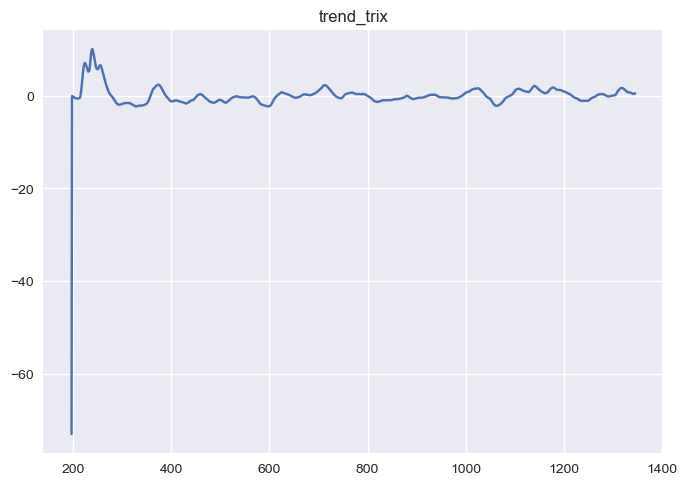

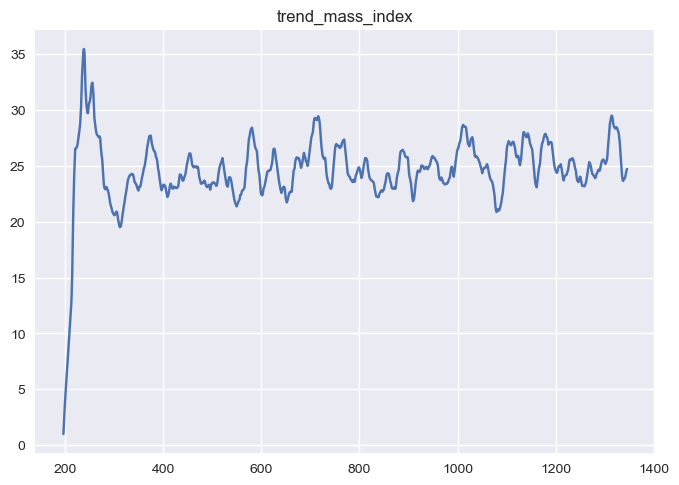

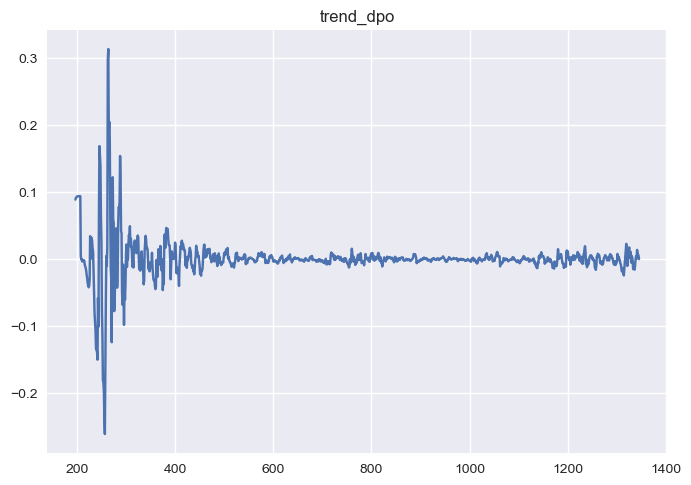

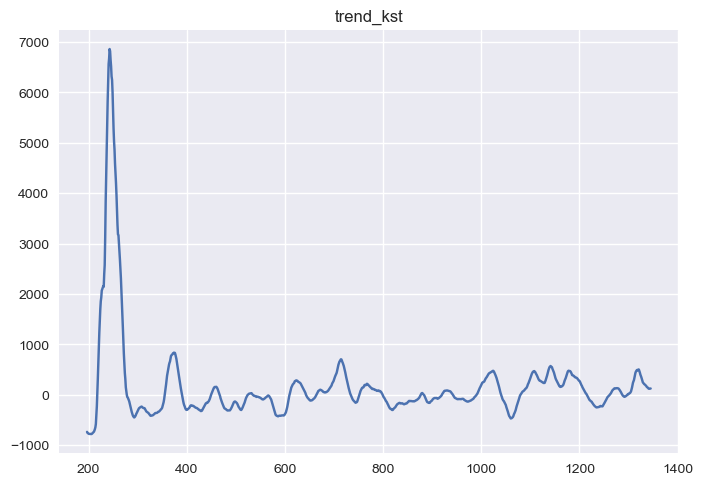

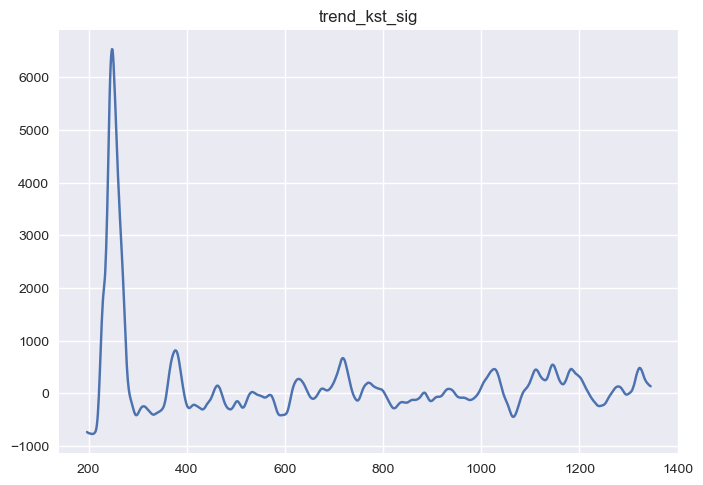

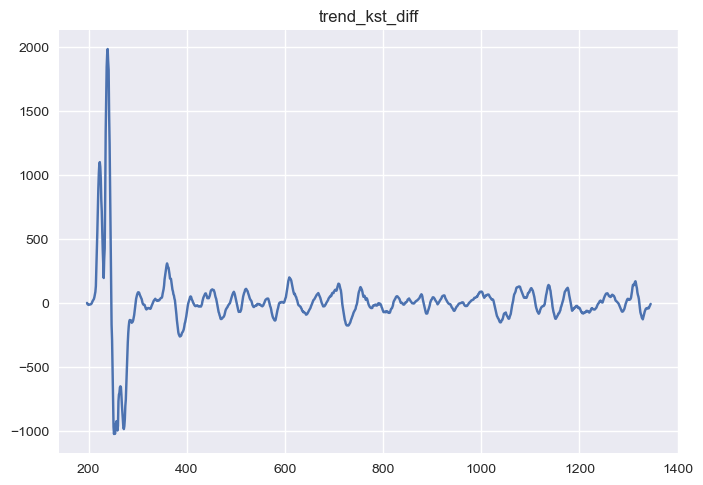

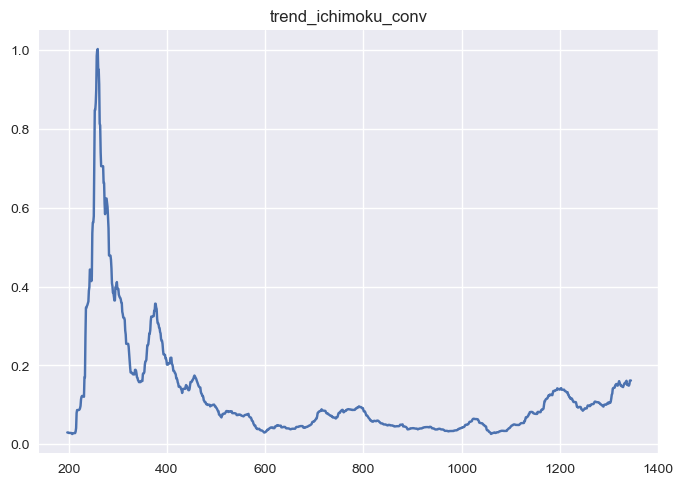

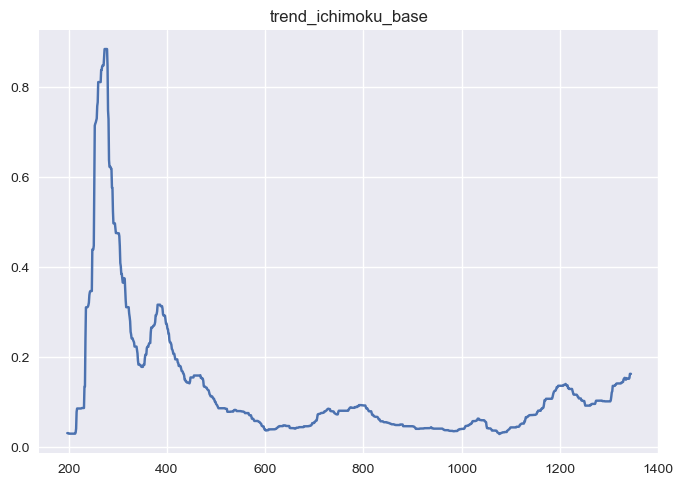

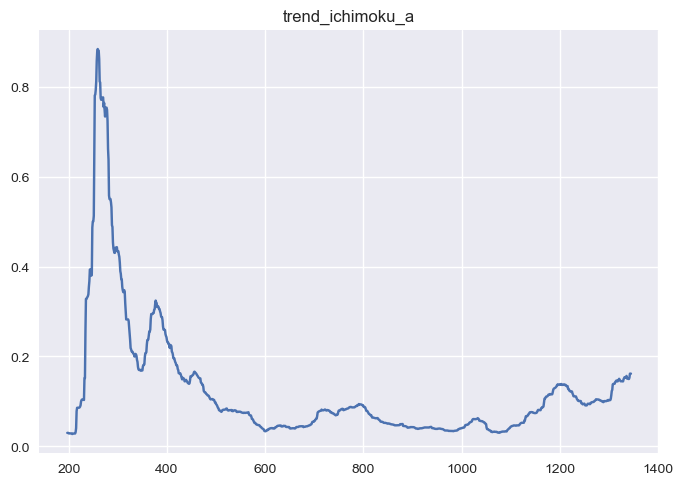

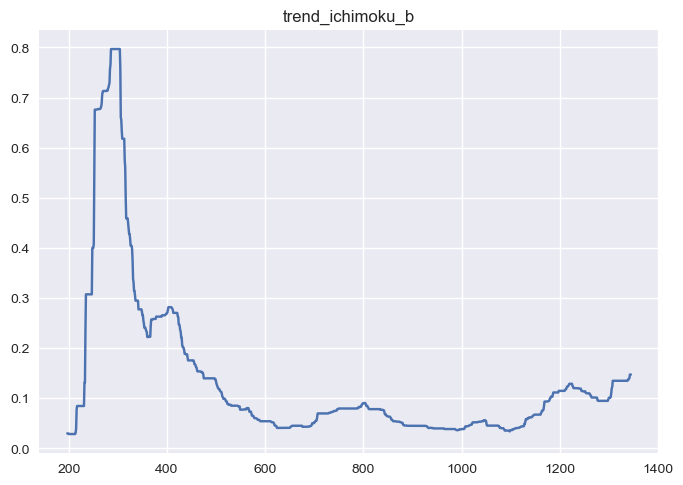

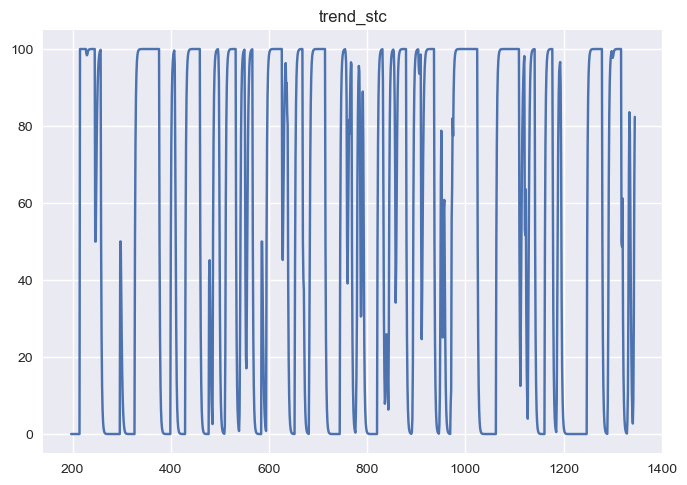

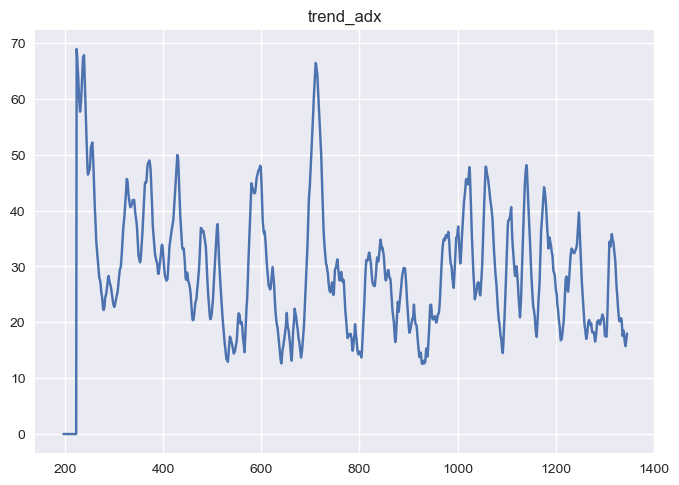

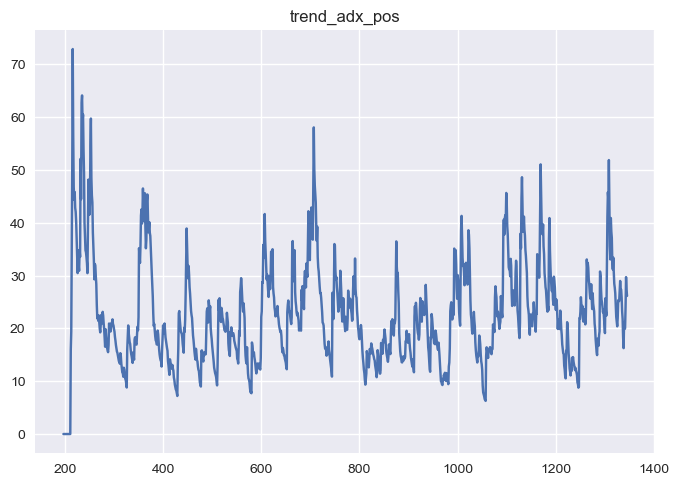

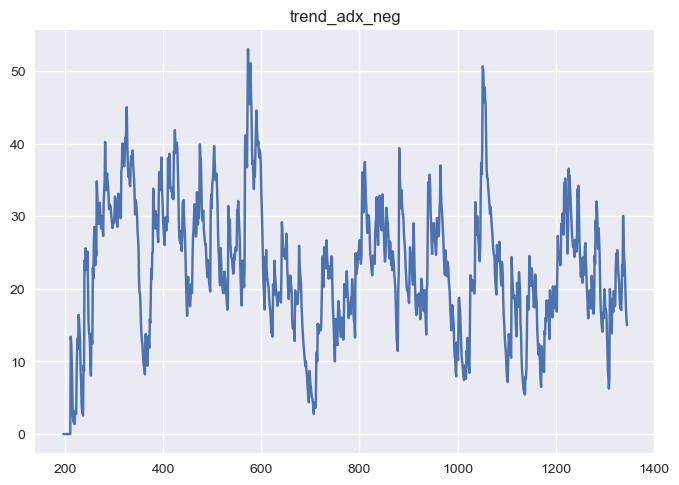

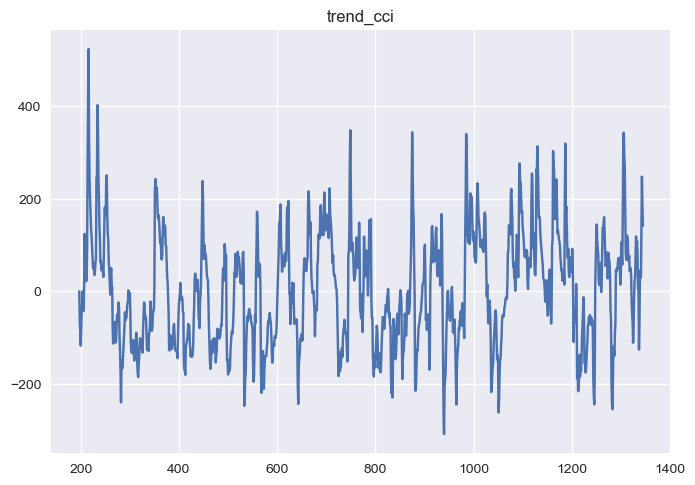

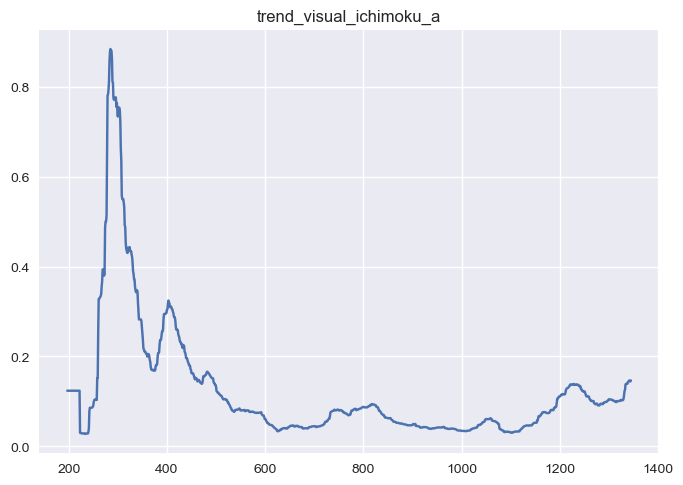

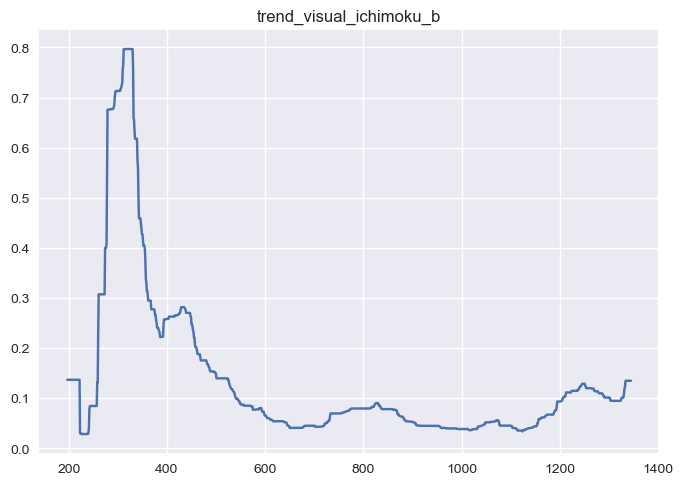

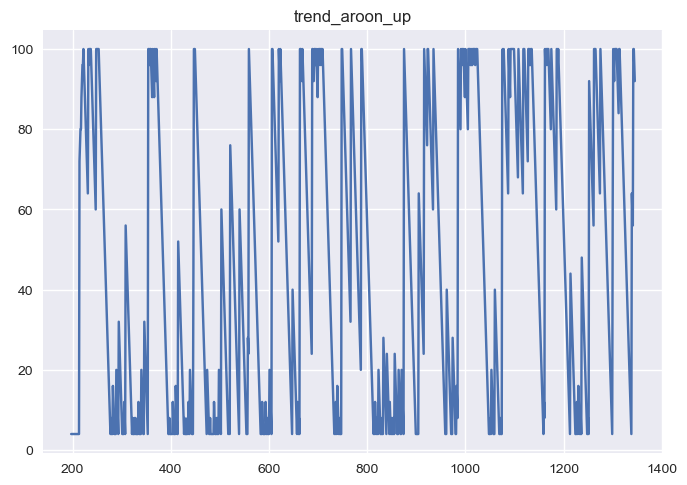

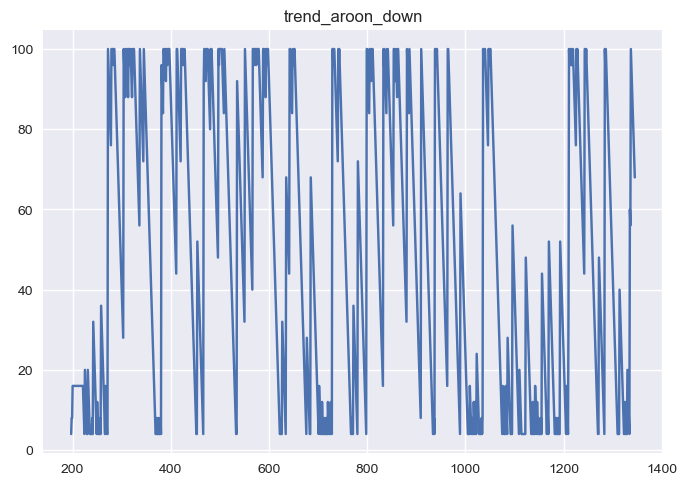

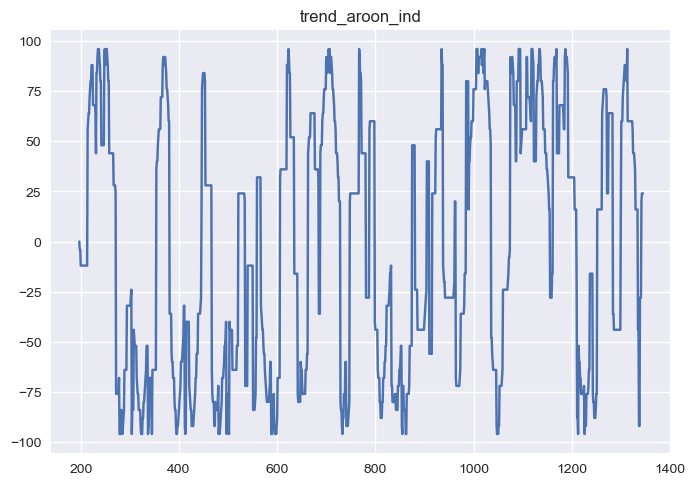

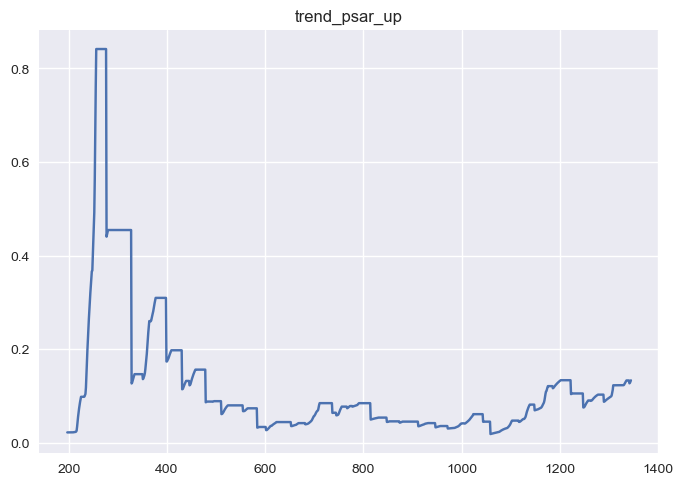

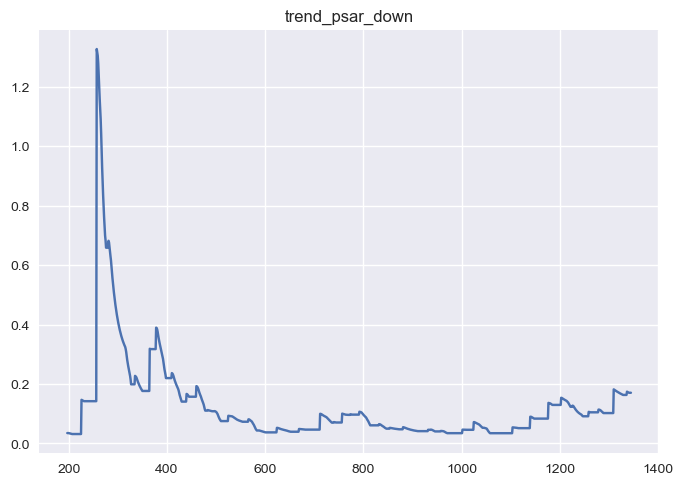

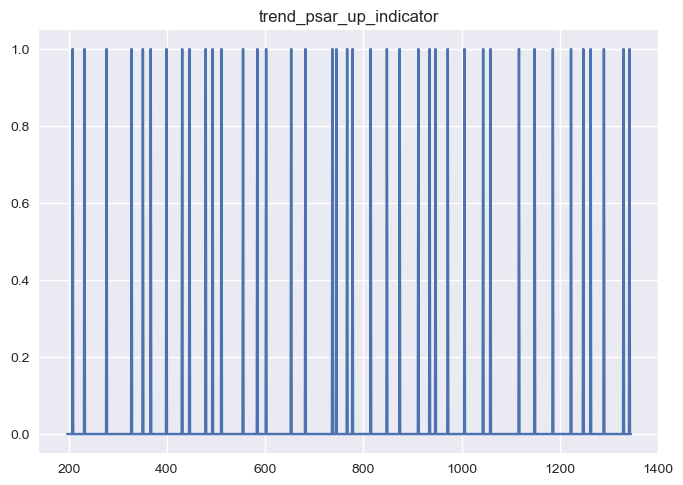

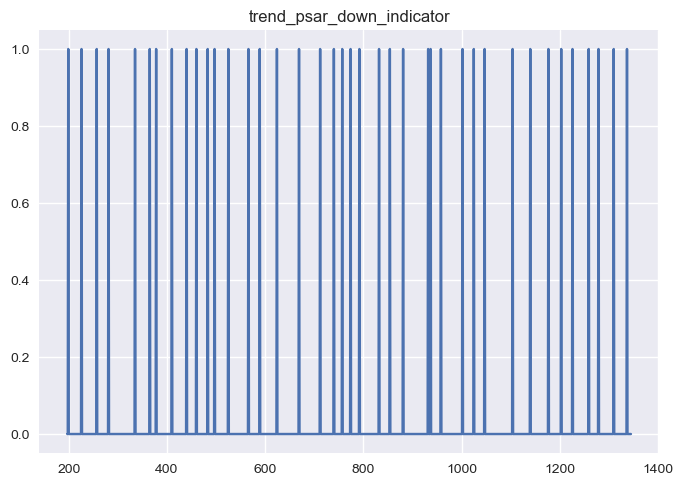

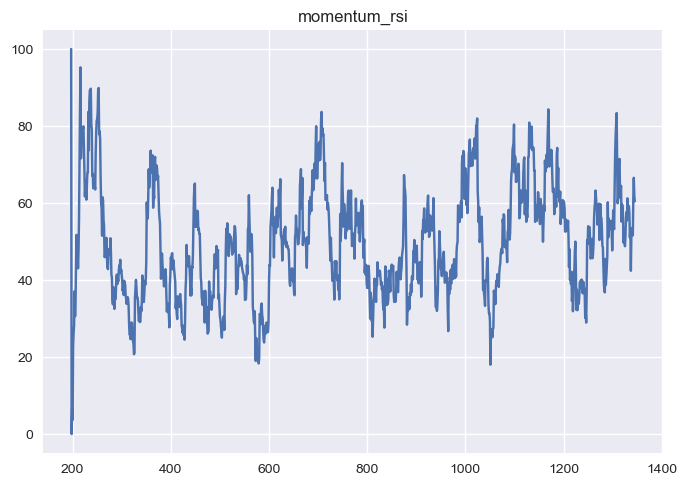

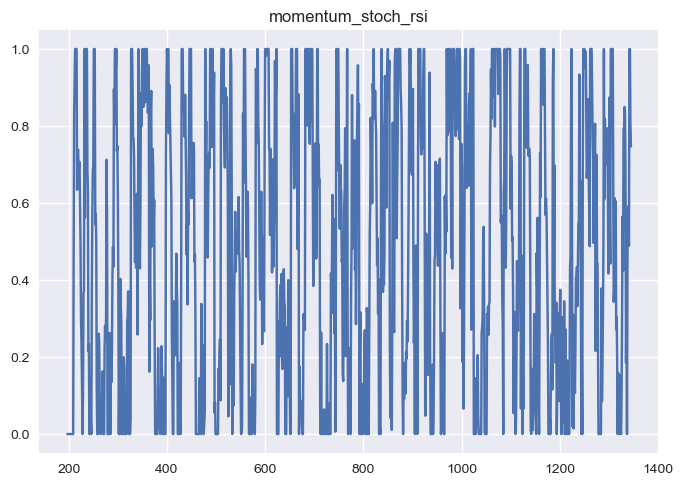

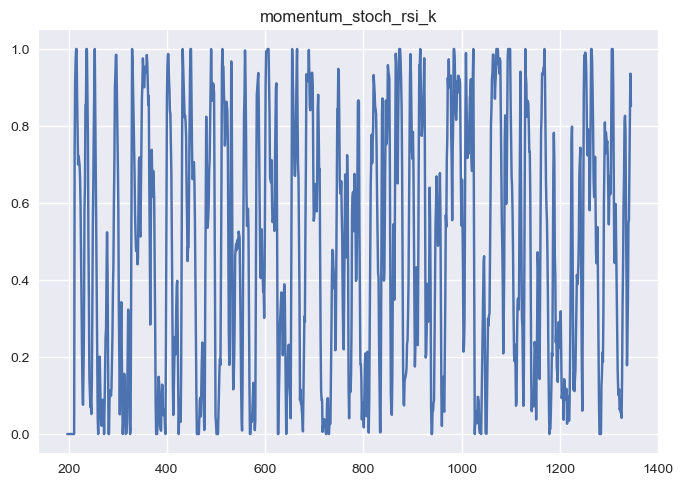

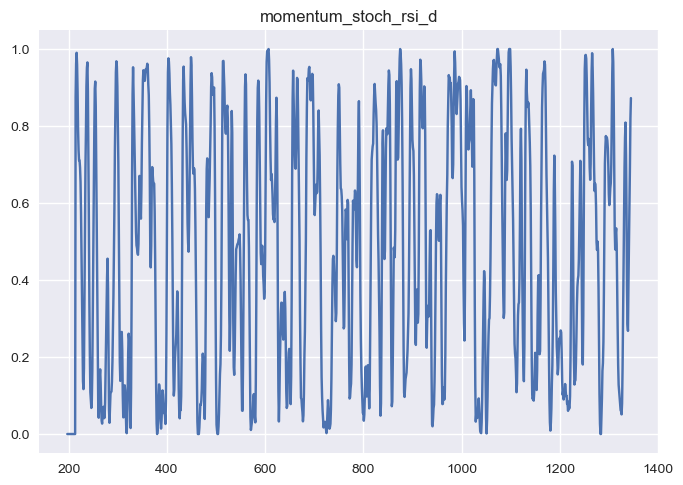

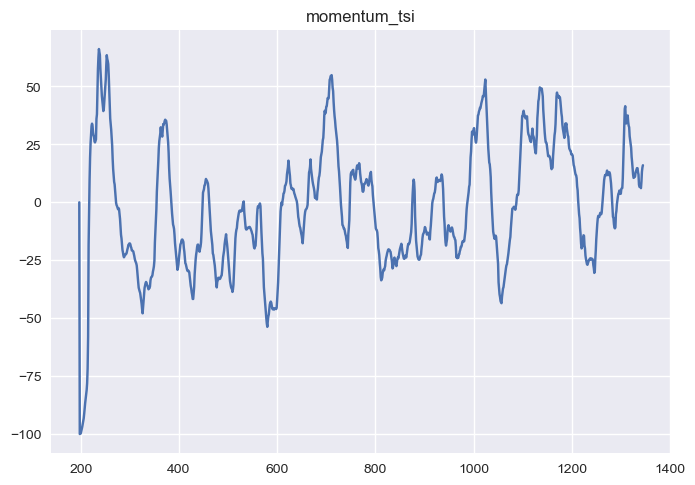

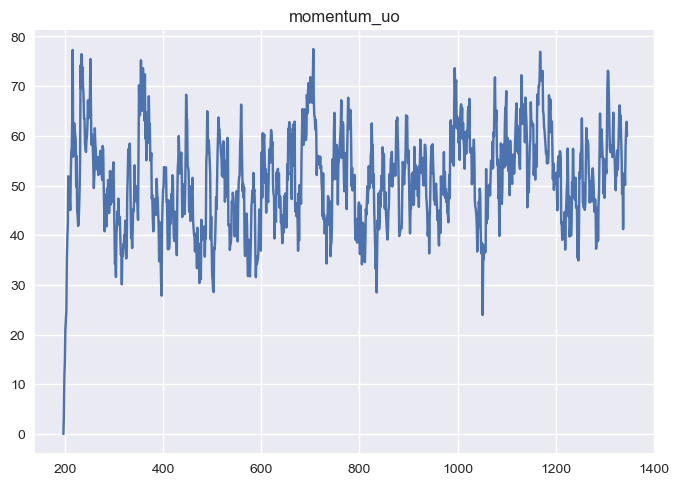

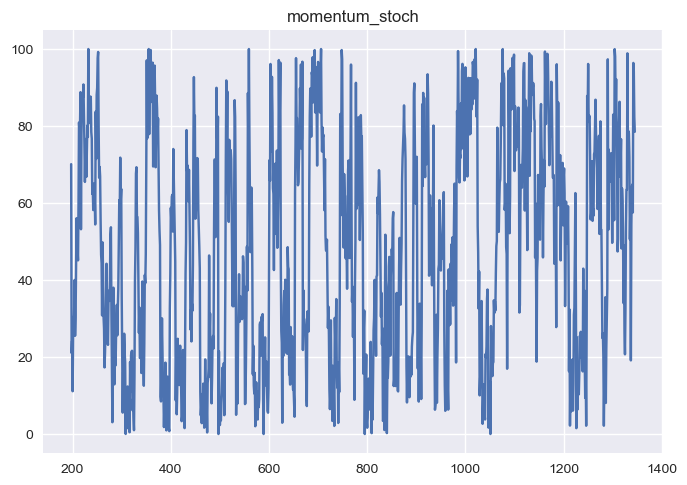

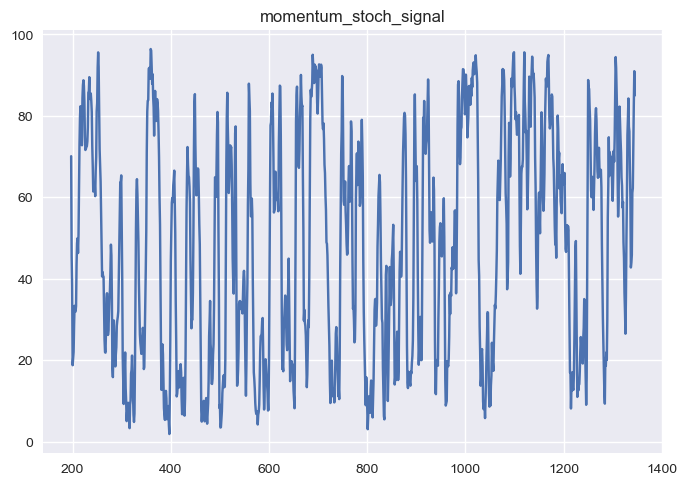

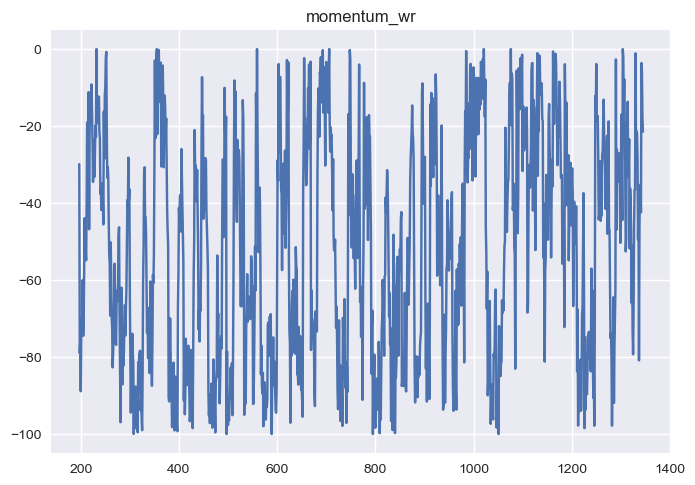

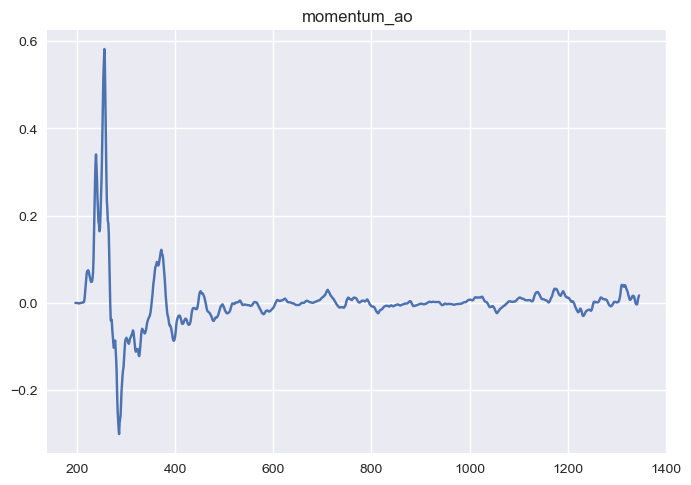

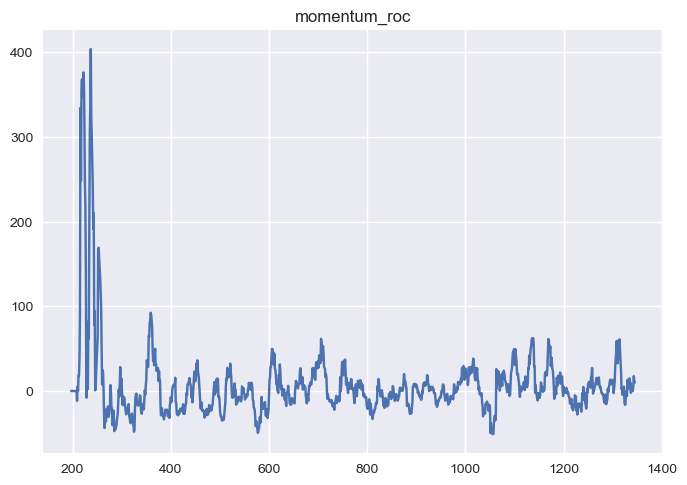

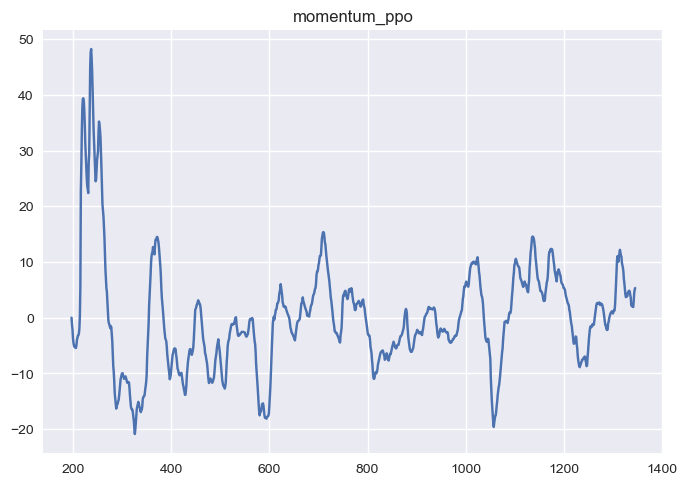

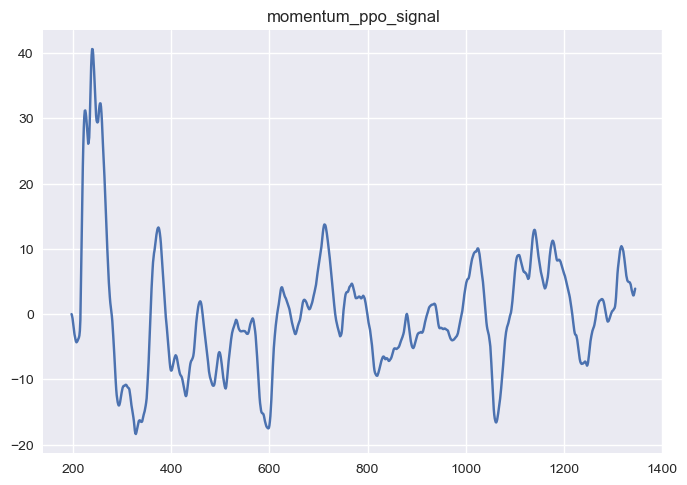

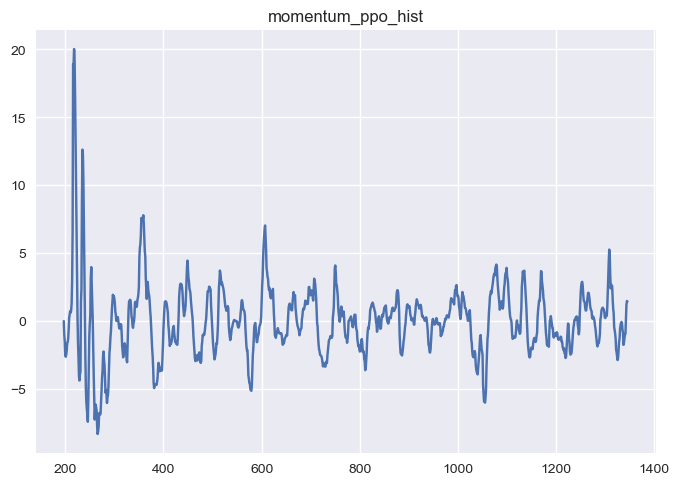

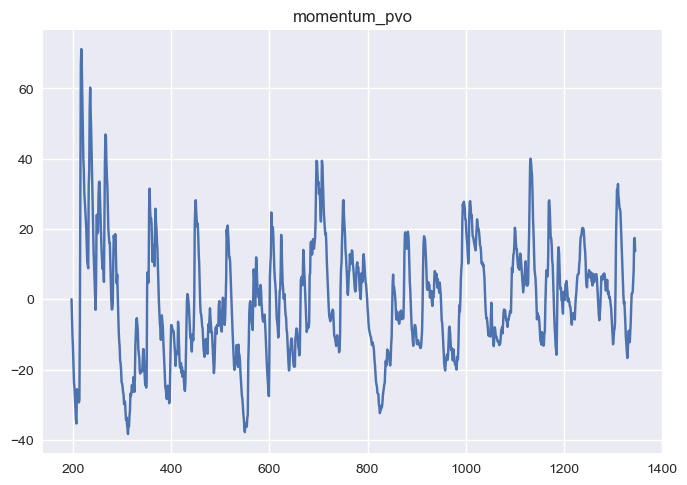

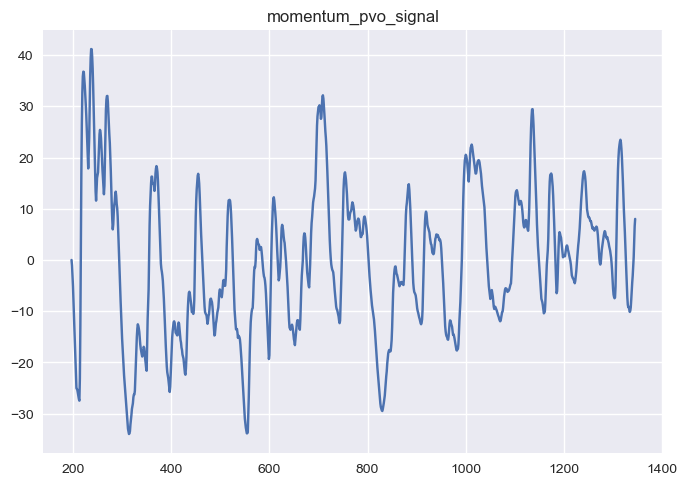

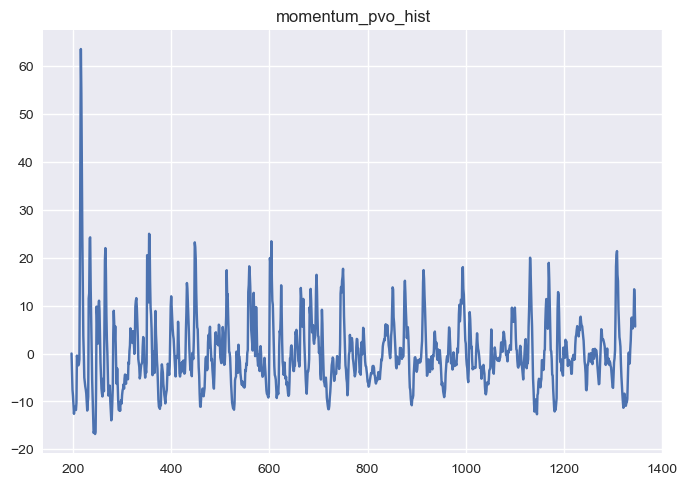

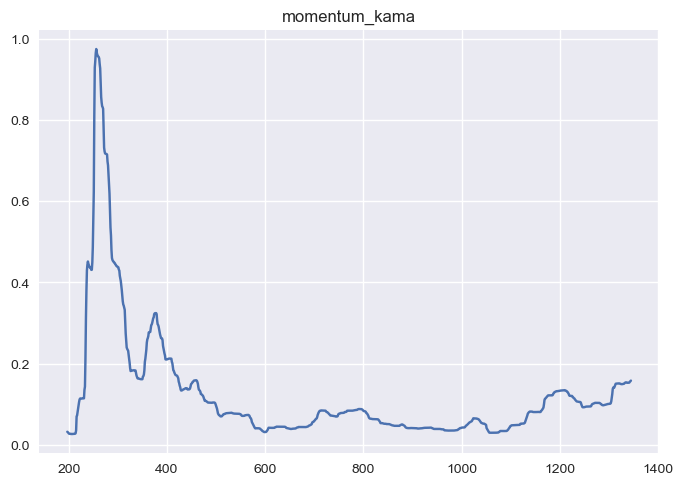

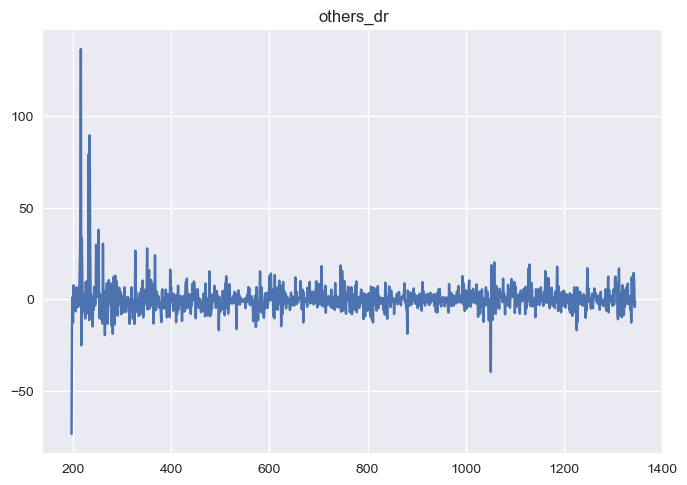

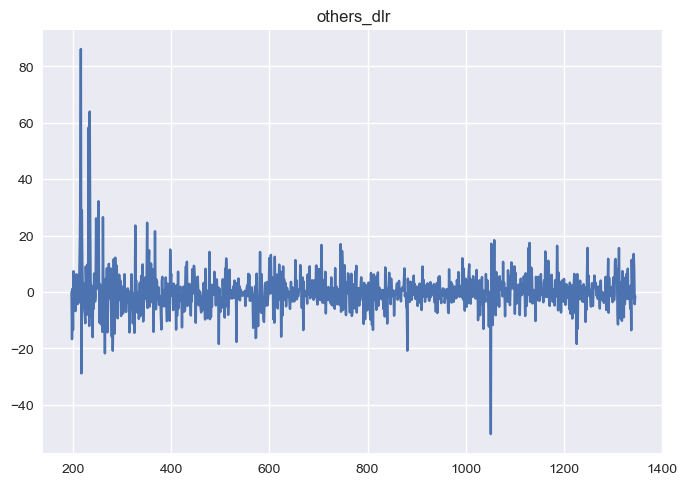

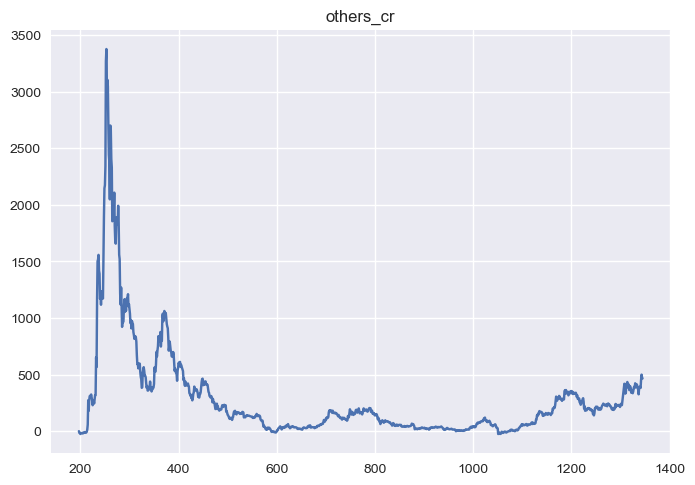

In [50]:
# All the features

for col in df.columns:
    plt.plot(df[col])
    plt.title(col)
    plt.show()